<a href="https://colab.research.google.com/github/joyc-mock/Capstone_project_repo/blob/main/LoanPredictionClassification2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**

--------------------------------
## **Context** 
-------------------------------

Retail banks can earn substantial profits on the interest from lending home equity loans. In contrast, banks incure costs and lose profits when a customer defaults on the loan. To avoid these losses, bank's strive to lend only to customer's who they determine are a low default risk. 

Traditionally, institutions use a process of assessing a customer’s credit-worthiness that is multi-faceted but also labor intensive and has resulted in human error and bias. With the emergence of data science and machine learning, banks have the opportunity to automate the loan approval process in a way that uses empirical data and statistical algorithms that are free of bias, reduce human error and adhere to the Equal Credit Opportunity Act’s guidelines.

Recent home value increases have created an attractive environment for banks to offer home equity loans. According to the House Price Index, the U.S. saw an average home price increase of 16% from April 2020 and April 2021 during the pandemic, the highest increase in 1 year since 1992. Additionally, many people who starting working from home during the pandemic began home improvement projects. Cash-out mortgage rates have increased making refinances on homes less desireable for the customer. Under these conditions, the home equity lending market is growing and institutions are poised to make significant profits on good loans that do not default. 

(https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx, https://thefinancialbrand.com/news/loan-growth/home-equity-credit-comeback-provides-loan-growth-for-banks-144793/)


----------------------------
## **Objective**
-----------------------------
*   To identify different factors that drive loan defaults
*   To build a model to predict if a customer will default on a loan or not

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/hmeq.csv"
hm = pd.read_csv(path)

In [ ]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [ ]:
data.shape

(5960, 13)



*   The dataset has **5960 rows and 13 columns**



### **Check the data types of the columns**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
data.dtypes.value_counts()

float64    9
int64      2
object     2
dtype: int64



*   The features reason for the loan request and type of job are of object type.
*   The rest of the columns are of numeric type. 
*   The object columns will need to be changed to a categorical type, as well as the column 'BAD' which is the target variable. 
*    All of the columns have missing values except for the target variable and loan amounts.  



### **Check for missing values**

In [ ]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    return missing_data 
missing_check(data)

,Total,Percent
DEBTINC,1267,0.212584
DEROG,708,0.118792
DELINQ,580,0.097315
MORTDUE,518,0.086913
YOJ,515,0.086409
NINQ,510,0.085570
CLAGE,308,0.051678
JOB,279,0.046812
REASON,252,0.042282
CLNO,222,0.037248


In [ ]:
data.duplicated().sum()

0

*   The debt to income ratio column has about 21% missing values. 
*   The number of major delinquent reports has about 12% missing values.   
*   There are 9 columns with missing values under 10% and the last 2 columns whether the customer defaulted ('BAD') and approved loan amount do not have any values missing. 
*   We will need to treat missing values before training the model. Even the highest percentage of missing values is relatively low, so we will keep the column and impute the missing values as median or mode approximations. 
*   The model will not know these aren't true values and it may affect model performance. It will be important to tell the model that these imputed values are approximations so it can learn their coefficients accordingly. 
*   There are no duplicated values in the dataset. 



### **Convert the data types**

In [ ]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is a classification problem and the target variable is categorical

cols.append('BAD')

In [ ]:
cols

['REASON', 'JOB', 'BAD']

In [ ]:
# Changing the data type of object type column to category. hint use astype() function

for i in cols:
    data[i] = data[i].astype('category')

In [ ]:
data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [ ]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


*   Object type features reason for the loan request, job type and the target variable, 'BAD", have been changed to categorical data types. 

### **Analyze Summary Statistics of the dataset**

In [ ]:
# Analyze the summary statistics for numerical variables

data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


*   The average home equity loan amount approved is about 18,607 with a median amount of about 16,300. Although this column has a max of 89,900, which suggests outliers, most of the data will be normally distributed.  
*   The amount of existing mortgage due has a wide range from 2,063 to 399,550. The average amount is about 73,760 with a median of about 65,019. Since the third quartile percentage is only 91,488 compared to the max, this column is right skewed with outliers. 
*   The average values of properties are higher than the mortgages due in all summary statistics, which makes sense when considering debt to income ratios. 
*   The average number of years for an applicant at their present job is about 9 years. The minimum is 0, and the first quantile is 3. Lending institutions typically look for at least 2 years at current job to establish stable work history. 
* The number of delinquent lines of credit and derogatory credit reports are mostly zero. 
* Debt to income ratio has a mean and median around 34% and a third quantile of about 39%. Banks may require debt to income ratios less than 36-47% and most values fall within that range. There is a max outlier of about 200%. 


In [ ]:
# Check summary for categorical data 

data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


In [ ]:
data.value_counts('BAD')

BAD
0    4771
1    1189
dtype: int64

In [ ]:
data.value_counts('REASON')

REASON
DebtCon    3928
HomeImp    1780
dtype: int64

In [ ]:
data.value_counts('JOB')

JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
dtype: int64

*   There are 1,189 defaulted loans in the dataset and 4,771 that have not defaulted. 
*   In the type of job the loan applicant has, there are 2,388 'Other' observations. This could be due to data collection techniques or available job options on the application.  
*   Most customers are getting home equity loans for debt consolidation (3,928). There were 1,780 loan approved for home improvement. 
*   There aren't any types of a categories that are similar enough to combine and the data is consistent.  



In [ ]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat.nunique())
    print('*'*40)

Unique values in BAD are :
BAD       2
REASON    2
JOB       6
dtype: int64
****************************************
Unique values in REASON are :
BAD       2
REASON    2
JOB       6
dtype: int64
****************************************
Unique values in JOB are :
BAD       2
REASON    2
JOB       6
dtype: int64
****************************************


*   The target variable and reason for loan request columns have only two unique values. 
*   In the 'BAD' column, 1 is a default while 0 is did not default. 
*   Reason for loan request is either a loan for debt consolidation or home improvment. 
*   The job type column has 6 unique values that are all different in nature. The 'other' type could be anything, but we don't have enough information to combine it with another job type. It also has the highest value count in that category, so we will leave it as is. 

## **Exploratory Data Analysis (EDA) and Visualization**

### **Univariate Analysis - Numerical Data**

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

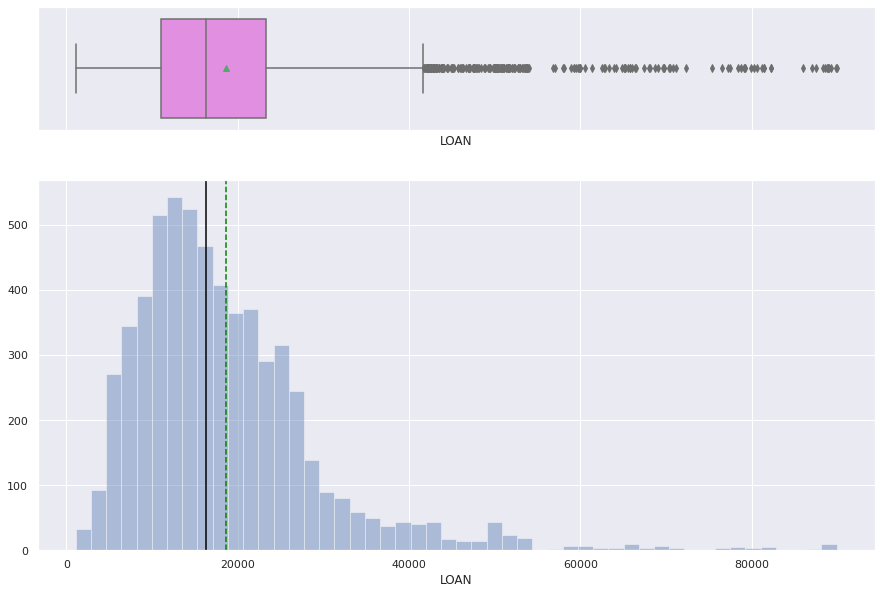

In [ ]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

*   The loan amounts approved follow a normal distribution and is skewed to the right with some very high outliers. 

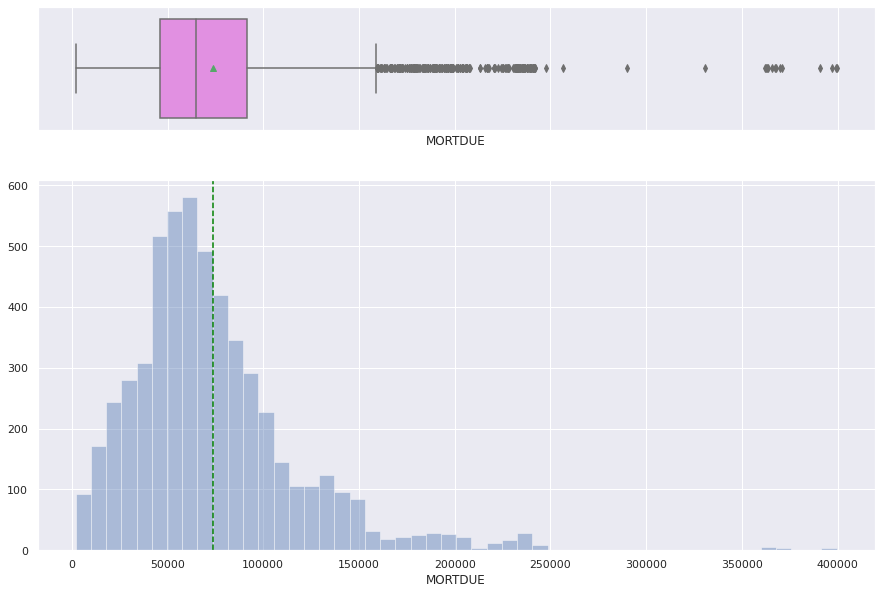

In [ ]:
histogram_boxplot(data['MORTDUE'])

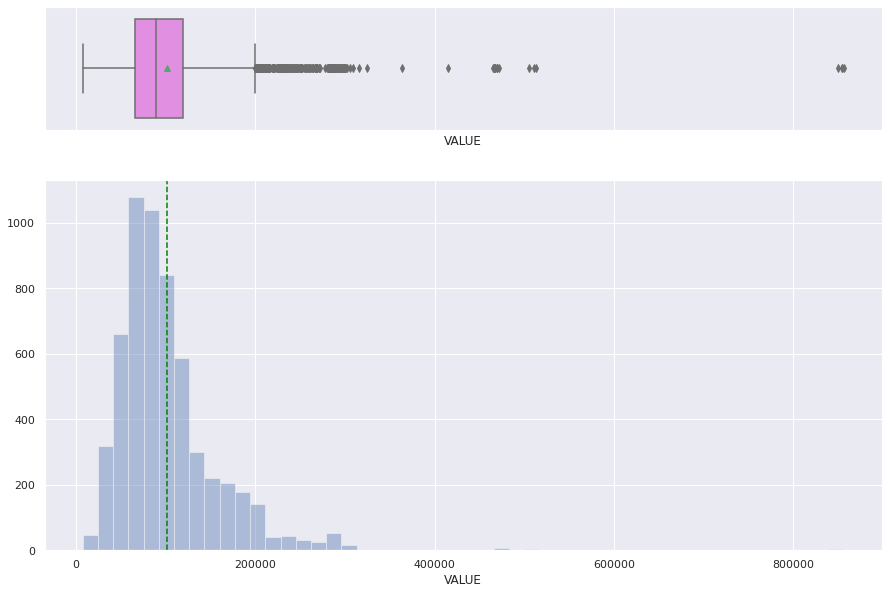

In [ ]:
histogram_boxplot(data['VALUE'])

*   The amounts of loan, current value of the property and the amount due on the existing mortgage, have a similar, normal distribution and are right skewed with right outliers. Higher value homes may have higher prices and mortgage payments. Loan amounts may increase when the value of a home increases because the customer has more equity to borrow against. 

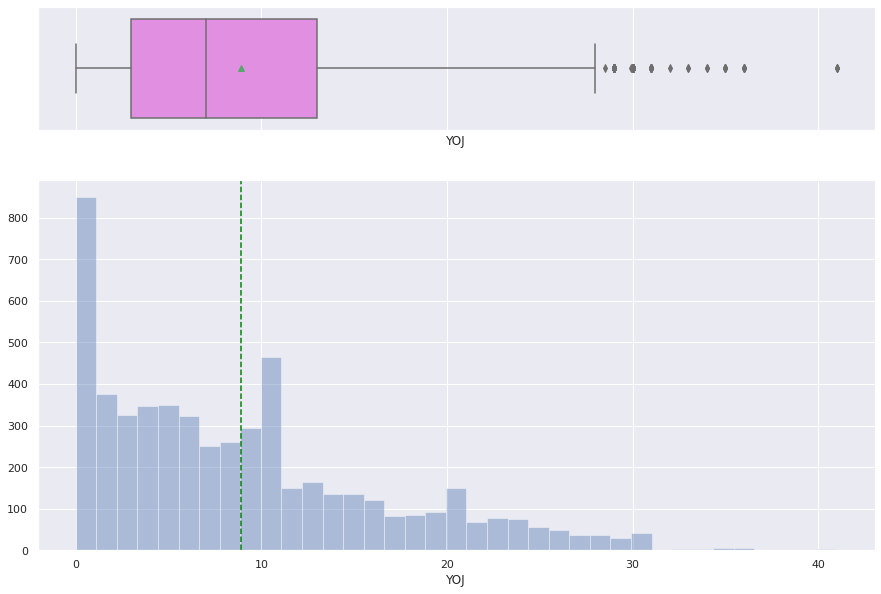

In [ ]:
histogram_boxplot(data['YOJ'])

*   The number of years an applicant has been at their job is very spread out with a peak at 0 and around 10 and 20 years. The most concerning statistic for loan default may be applicants with 0 years at their current job because this may indicate an unstable work history. 

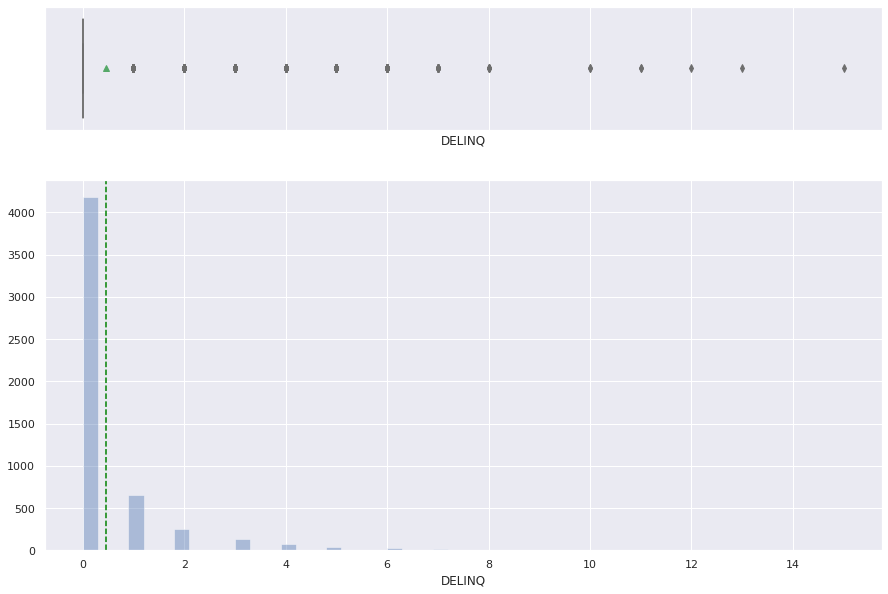

In [ ]:
histogram_boxplot(data['DELINQ'])

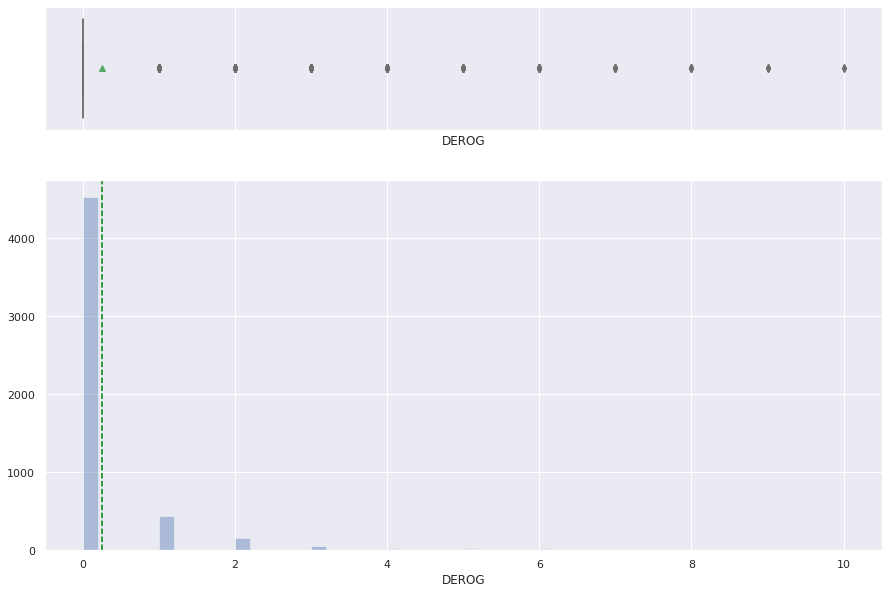

In [ ]:
histogram_boxplot(data['DEROG'])

*   Most approved loan customer have 0 delinquent lines of credit and no major derogatory reports. These can be thought of as ordinal categorical variables.  

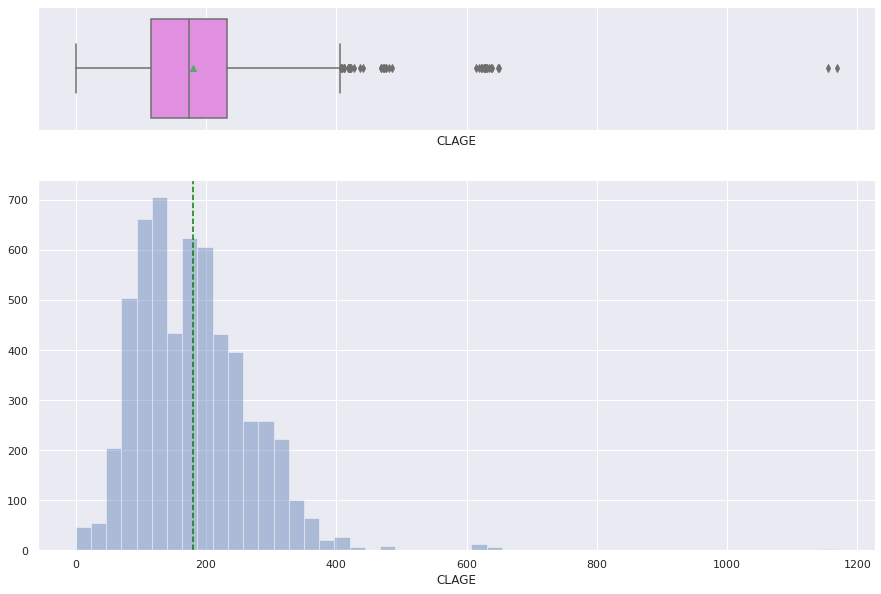

In [ ]:
histogram_boxplot(data['CLAGE'])

*   The age of customer's oldest credit line has a normal distribution that is lightly right skewed with some outliers. Older lines of credit indicate longer credit histories that may be more stable and indicate good money management practices. 

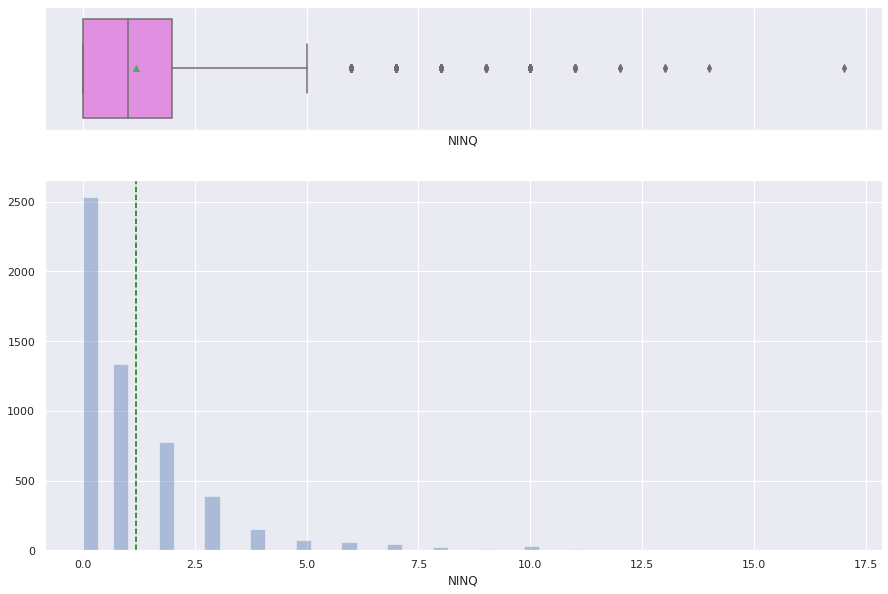

In [ ]:
histogram_boxplot(data['NINQ'])

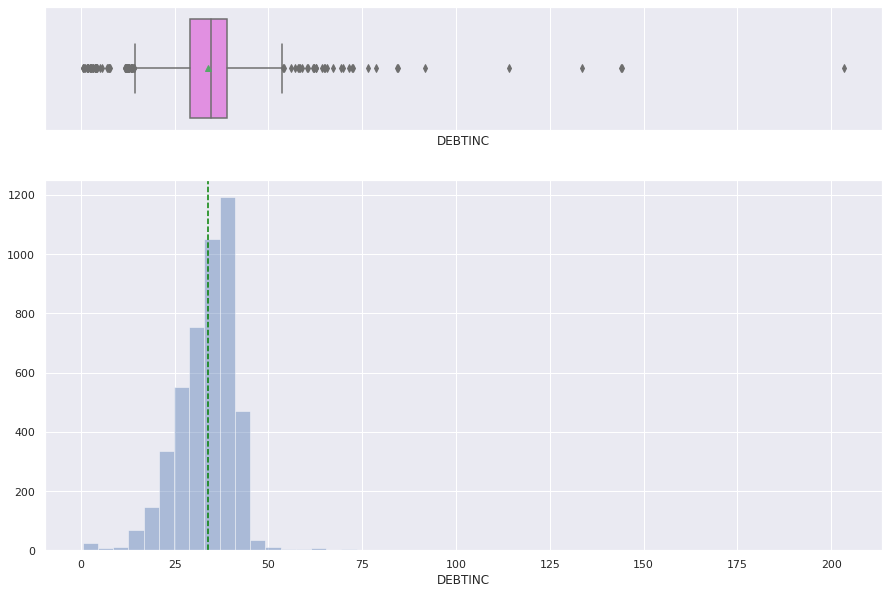

In [ ]:
histogram_boxplot(data['DEBTINC'])

*   The number of recent credit inquiries in the data is a numeric variable with most customers having 0 inquiries. 
*   Less approved customers have high amounts of inquiries. The number of inquiries could reflect a customer shopping around for the best rates and terms, if each inquiry is of the same type. It could also reflect a customer who is looking for numerous types of debt options, which could indicate poor money management practices. It would be helpful to have the types of loan inquiries in addition to the amount, to see if the customer is looking for multiple products or just one. 
*   Debt to income ratio has a normal distribution, skewed right, with outliers. 

### **2. Univariate Analysis - Categorical Data**

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

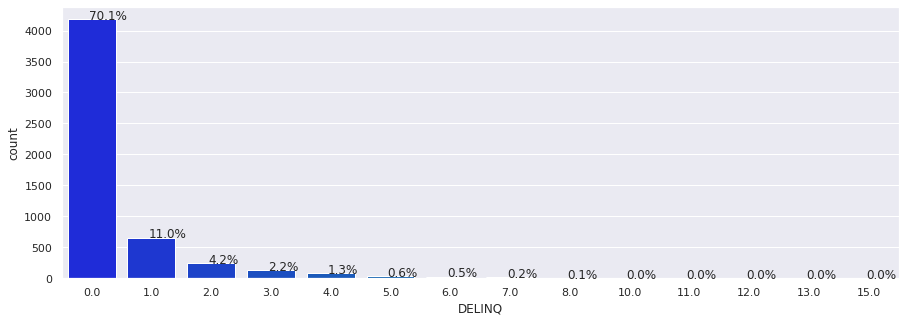

In [ ]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

*  About 70 percent of applicants do not have delinquent credit lines. 

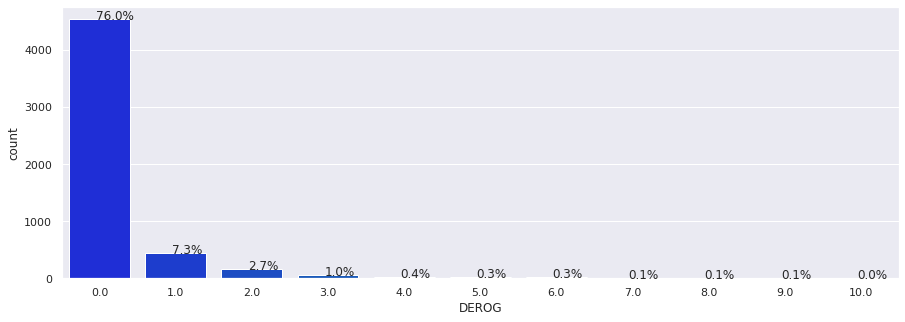

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

*   About 76 percent of applicants do not have major derogatory reports and is close to amount of delinquencies, which was expected. 
*   We may want to focus on the ones that do have both delinquencies and dreogatory reports to see if these are the same applicants who are defaulting.

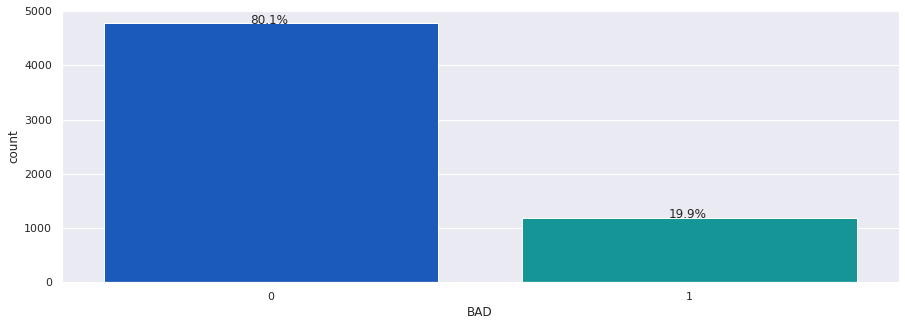

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])

 
*   About 80 percent of loans did not default. About 20 percent of approved loans in the dataset did default. 

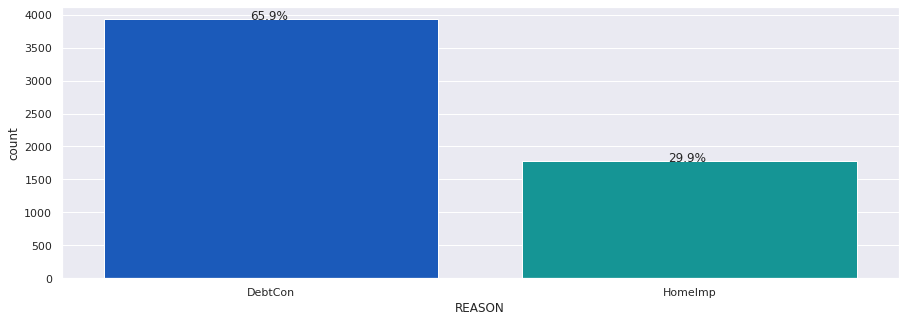

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

*   About 70% of home equity loans are for debt consolidation and about 30% are for home improvement. 

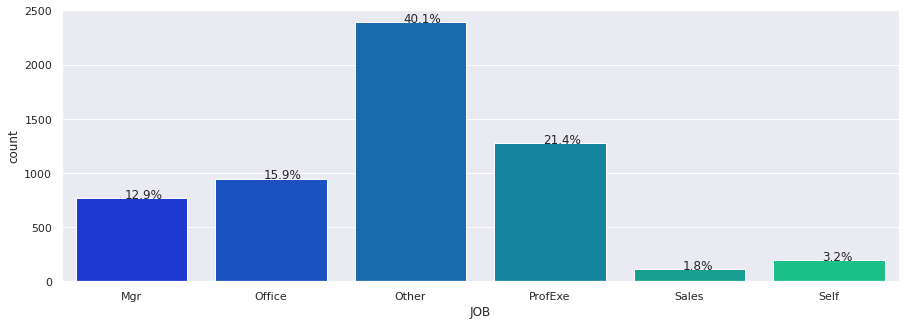

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

*   The sales job type has the lowest amount of customers approved at only 1.8%. 
*   The other job type has the highest amount of customers approved at 40.1%. 
*   There could be many types of jobs in the other column that we do not know. It would be helpful if there were more job description types to better interpret the data. 

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

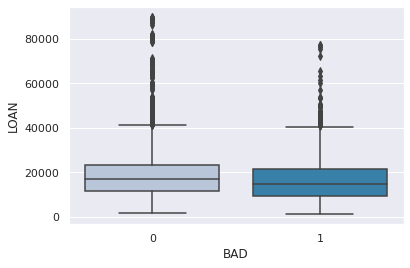

In [ ]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

* The defaults on loan amounts approved for applicants are similar to those who do not default.

####**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

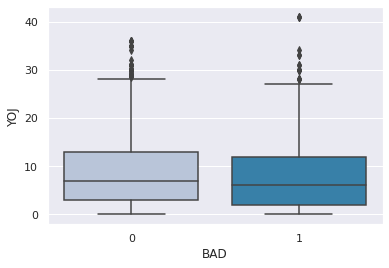

In [ ]:
sns.boxplot(data["BAD"],data['YOJ'],palette="PuBu")



*   The boxplot shows slightly less defaults for customers with longer years a current job. 



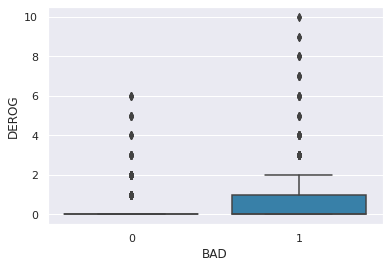

In [ ]:
sns.boxplot(data["BAD"],data['DEROG'],palette="PuBu")

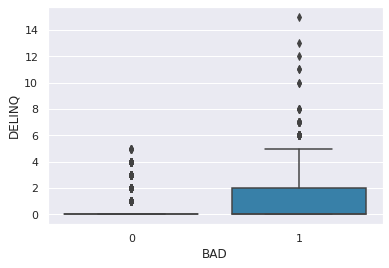

In [ ]:
sns.boxplot(data["BAD"],data['DELINQ'],palette="PuBu")

*   There are more applicants with high numbers in major derogatory reports and in delinquent credit lines who default than those who have lower amounts in both categories. 

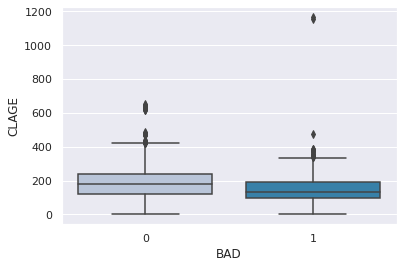

In [ ]:
sns.boxplot(data["BAD"],data['CLAGE'],palette="PuBu")

*   Customers with older credit lines defaulted less than those with newer credit lines. 

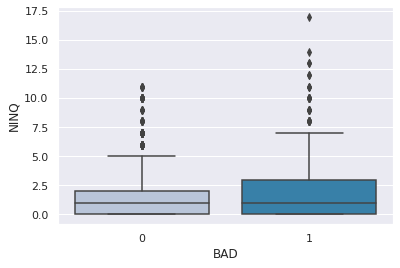

In [ ]:
sns.boxplot(data["BAD"],data['NINQ'],palette="PuBu")

*   Customers who have higher amounts of recent credit inquiries default more than those who have less amounts of recent credit inquiries. 

### **Bivariate Analysis: Two Continuous Variables**

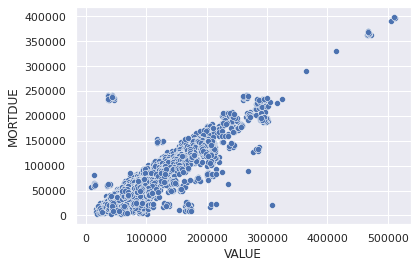

In [ ]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

*   The amount due on the existing mortgage and the current value of the property have a strong positive correlation. 

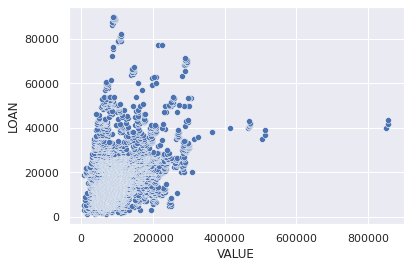

In [ ]:
sns.scatterplot(data["VALUE"],data['LOAN'],palette="PuBu")

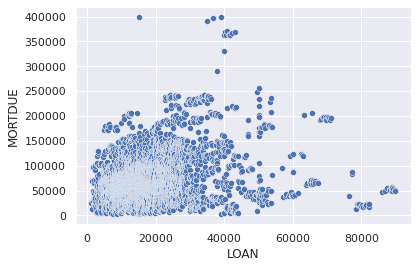

In [ ]:
sns.scatterplot(data["LOAN"],data['MORTDUE'],palette="PuBu")

*   Loan amounts, the value of the current property and amount due on existing mortgage amount due are highly corellated. 

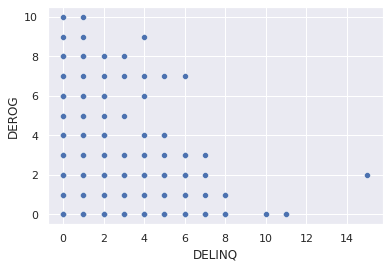

In [ ]:
sns.scatterplot(data["DELINQ"],data['DEROG'],palette="PuBu")

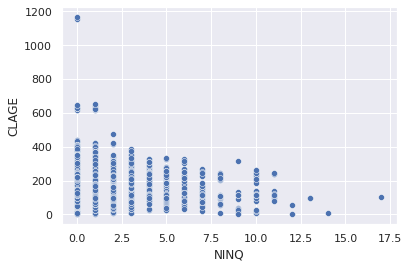

In [ ]:
sns.scatterplot(data['NINQ'],data['CLAGE'], palette="PuBu")

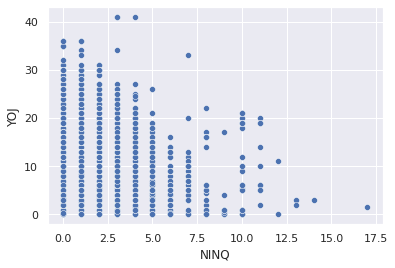

In [ ]:
sns.scatterplot(data['NINQ'],data['YOJ'], palette="PuBu")

<Figure size 1152x1152 with 0 Axes>

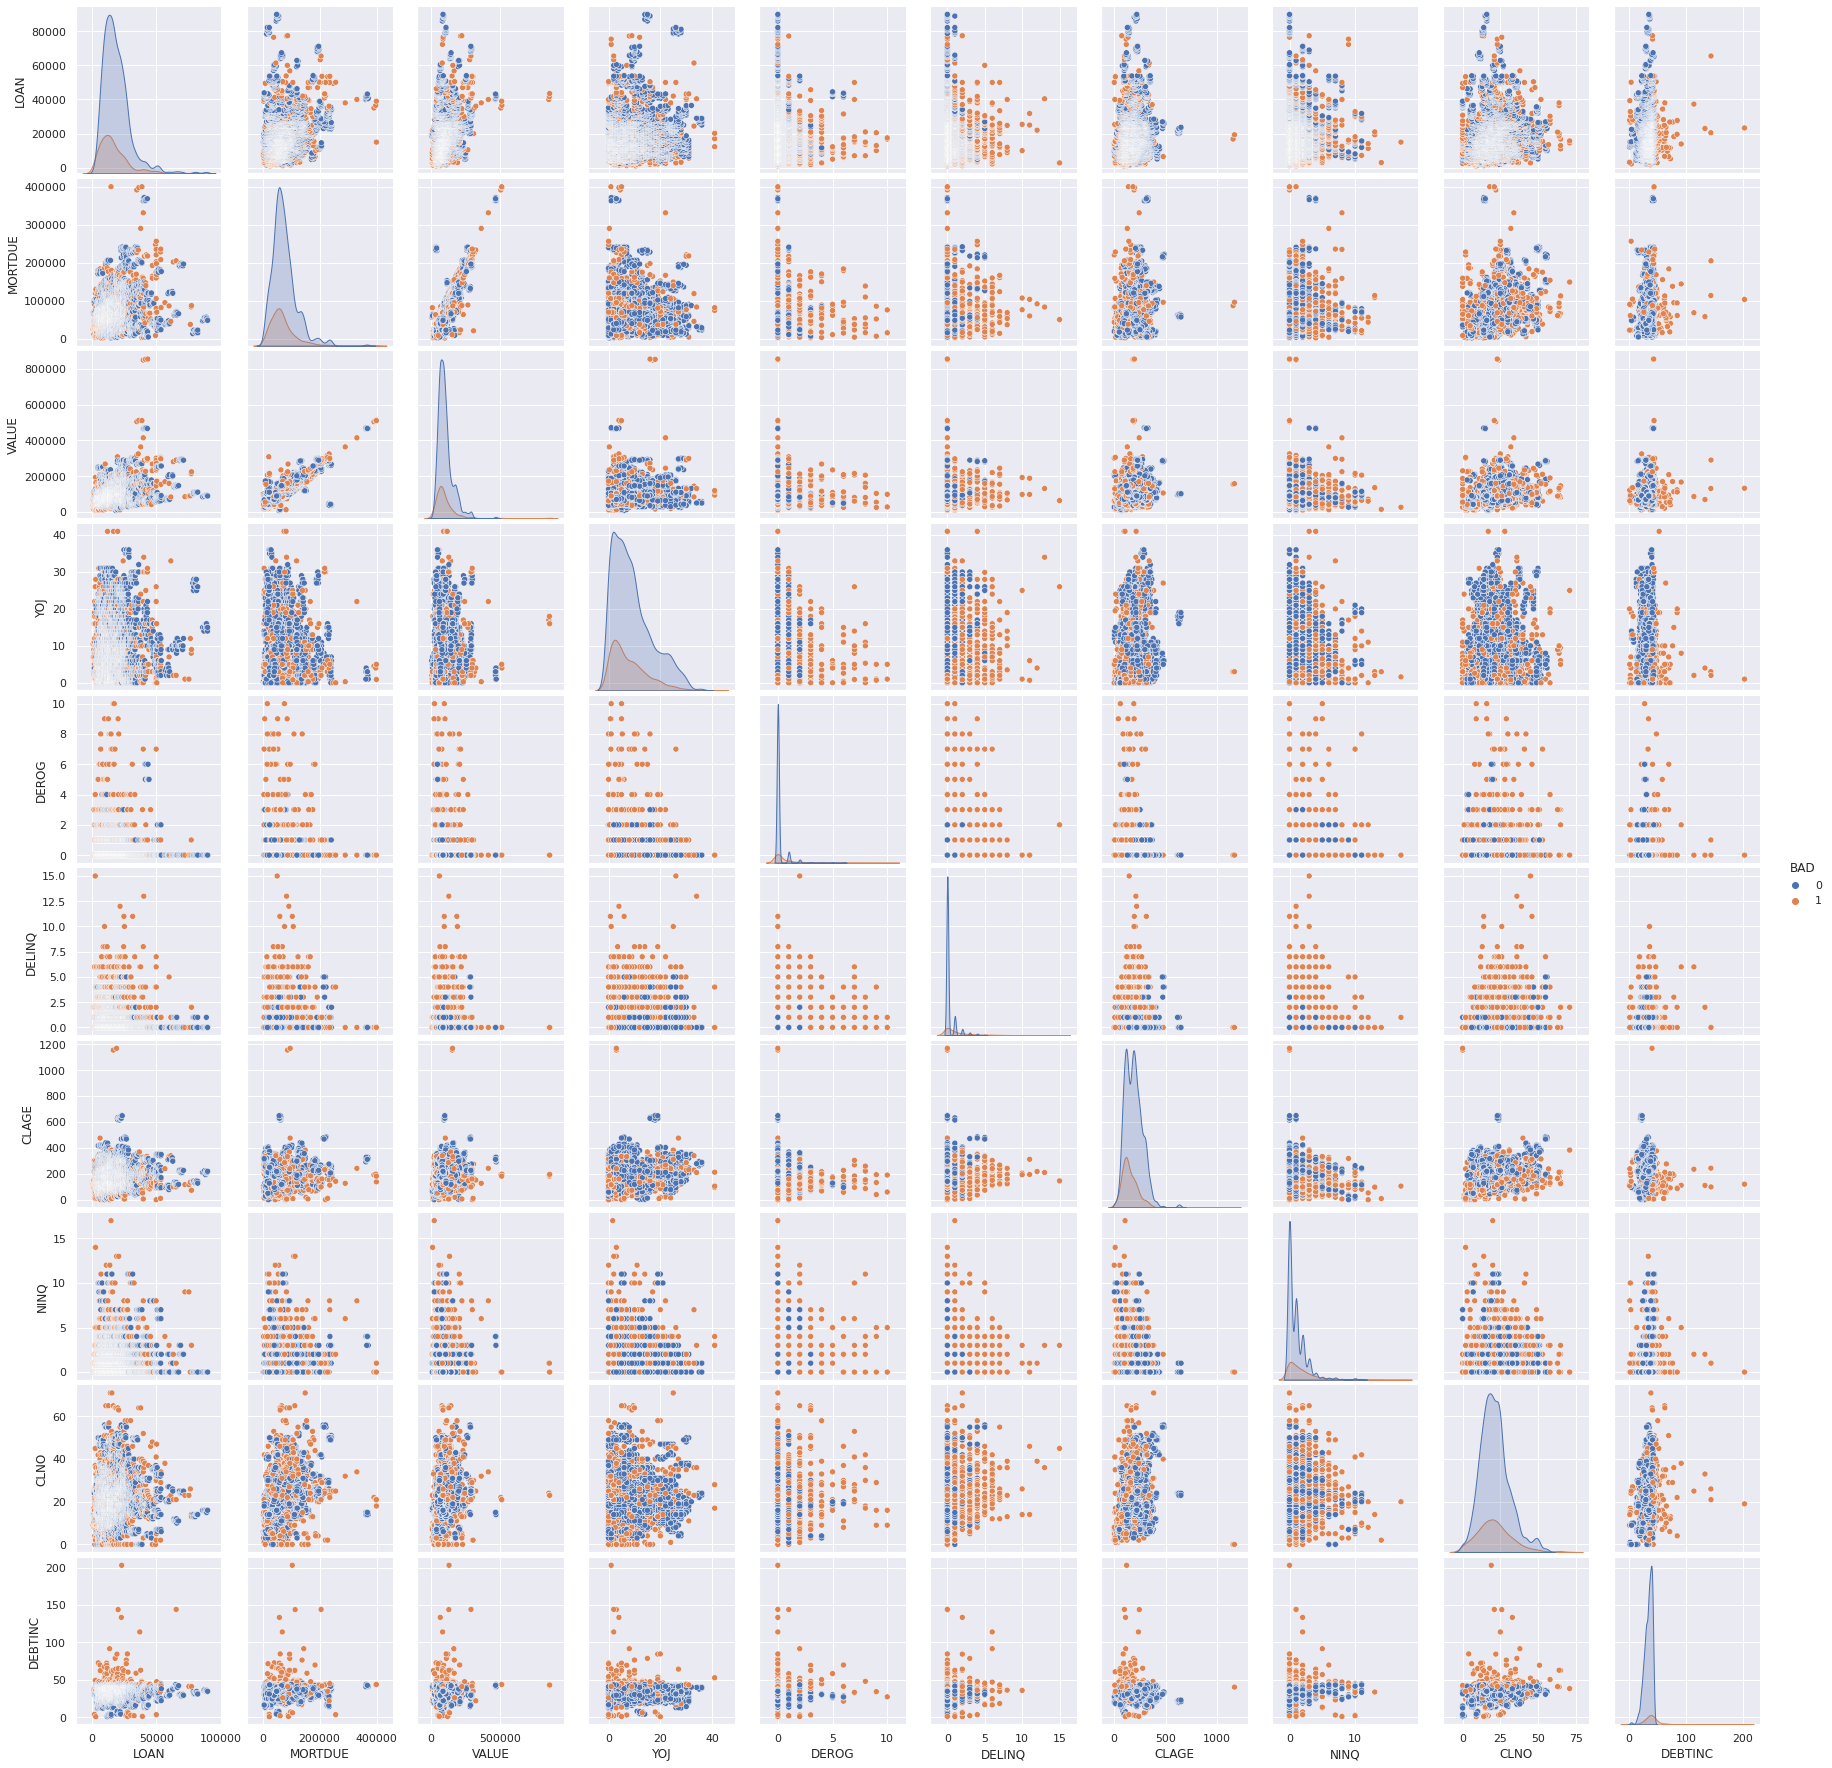

In [ ]:
plt.figure(figsize=(16,16))
sns.pairplot(data, diag_kind='kde', hue = 'BAD')

### **Bivariate Analysis:  BAD vs Categorical Variables**

In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

BAD      0     1   All
NINQ                  
0.0   2135   396  2531
1.0   1085   254  1339
2.0    599   181   780
3.0    285   107   392
4.0     95    61   156
5.0     39    36    75
6.0     27    29    56
7.0     29    15    44
8.0     11    11    22
9.0      5     6    11
10.0    19     9    28
11.0     7     3    10
12.0     0     2     2
13.0     0     2     2
14.0     0     1     1
17.0     0     1     1
All   4336  1114  5450
------------------------------------------------------------------------------------------------------------------------


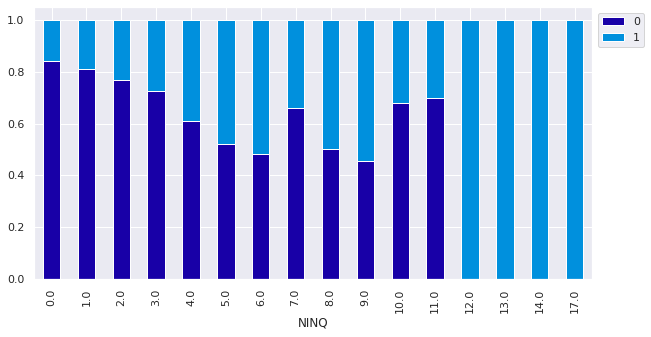

In [ ]:
stacked_plot(data['NINQ'])

*   All customers who had more than 11 recent credit inquiries defaulted on their loan. 

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


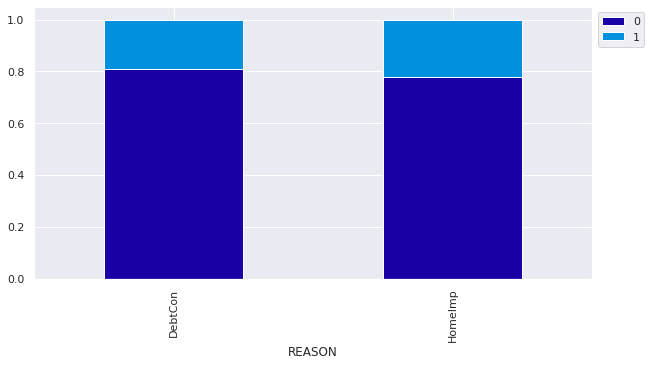

In [ ]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

*   Loans approved for home improvement and debt consolidation both have about a 20% default rate. 

#### Bivariate Analysis on different pairs of Categorical vs BAD

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


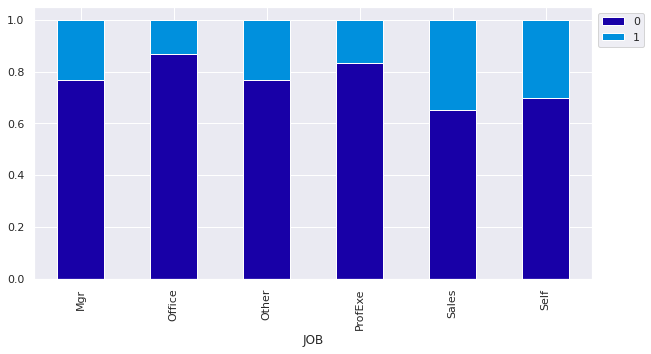

In [ ]:
stacked_plot(data['JOB'])

*   Loans approved for customers in sales positions had the highest number of defaults. This is interesting because sales positions only make up 1.8% of the data.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

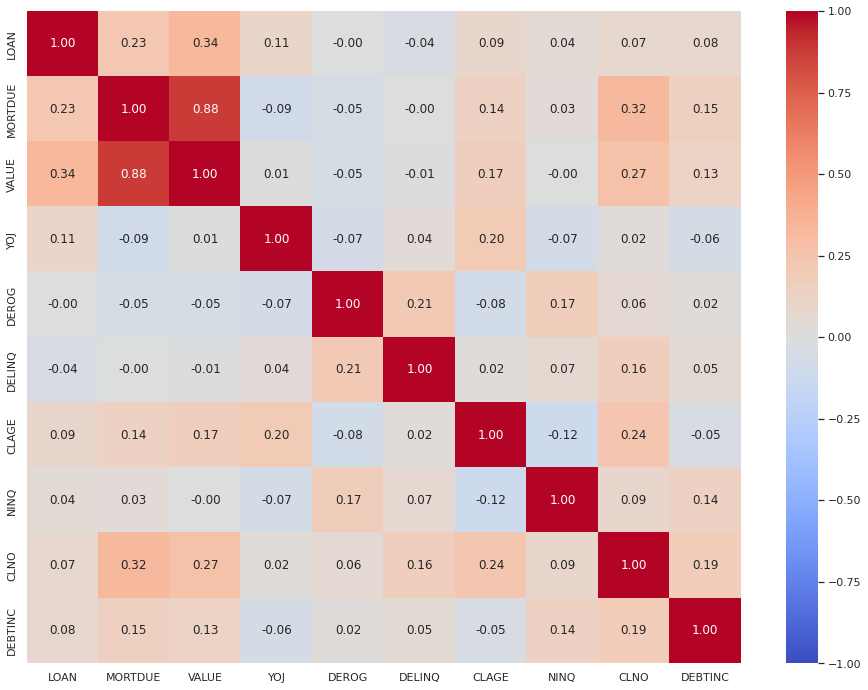

In [ ]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()
# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',annot=True, vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [ ]:
corr_matrix = data.corr()
corr_matrix

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
LOAN,1.000000,0.228595,0.335393,0.105728,-0.001302,-0.035144,0.088540,0.044487,0.072631,0.084735
MORTDUE,0.228595,1.000000,0.875666,-0.088480,-0.049516,-0.001044,0.140047,0.031392,0.323631,0.154939
VALUE,0.335393,0.875666,1.000000,0.007759,-0.048689,-0.014103,0.171238,-0.004398,0.269149,0.132174
YOJ,0.105728,-0.088480,0.007759,1.000000,-0.065879,0.038153,0.201718,-0.071627,0.024838,-0.055891
DEROG,-0.001302,-0.049516,-0.048689,-0.065879,1.000000,0.211832,-0.083047,0.173934,0.061884,0.017065
DELINQ,-0.035144,-0.001044,-0.014103,0.038153,0.211832,1.000000,0.022488,0.067812,0.164639,0.052364
CLAGE,0.088540,0.140047,0.171238,0.201718,-0.083047,0.022488,1.000000,-0.116935,0.237987,-0.046477
NINQ,0.044487,0.031392,-0.004398,-0.071627,0.173934,0.067812,-0.116935,1.000000,0.088389,0.141344
CLNO,0.072631,0.323631,0.269149,0.024838,0.061884,0.164639,0.237987,0.088389,1.000000,0.185539
DEBTINC,0.084735,0.154939,0.132174,-0.055891,0.017065,0.052364,-0.046477,0.141344,0.185539,1.000000



*   There is a strong, positive corellation/relationship between the value of a home and mortgage payment due. This makes sense if higher value homes are sold a higher prices which require a larger mortgage payment on a bigger loan. 
*   There is a moderate, positive relationship between the value of the property and loan amount. Customers may have greater equity in homes that have a greater values to borrow from. 
*   There is also a moderate, positive relationship between the number of existing credit lines and mortgage amount due. Customers who have higher mortgage payments may also have more established credit histories. 



In [ ]:
# Build pairplot for the data with hue = 'BAD'

In [ ]:
sns.pairplot(data, hue = 'BAD')

#### Treating Outliers

In [ ]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75) # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [ ]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

*   Outliers have been capped at their first and third quantiles or upper and lower whiskers since regression models can be sensitive to outliers. 

#### Adding new columns in the dataset for each column which has missing values 

In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [ ]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

*   A binary column feature has been added to the dataset to indicate for the model if a value is actual or estimated. This will provide the model with additional information in learning coefficients. 

In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,True
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True


#### Filling missing values in numerical columns with median for numeric variables and mode for categorical variables

In [ ]:
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist() #df.select_dtypes('object')

# Fill numeric columns with median.
df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with mode.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

*   Missing values have been imputed with the median for numerical variables and the mode for categorical variables. 

In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500.0,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True


## **Data Preparation**

### **Separating the target variable from other variables**

In [ ]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix

X = df.drop(['BAD'],axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X,drop_first=True)

# Create y(dependent variable)
y = df['BAD']

### **Splitting the data into 70% train and 30% test set**

In [ ]:
# Split the data into training and test set
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4172, 27) (1788, 27)


In [ ]:
X_train

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,...,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
1355,10600.0,66590.0,77465.0,1.0,0.0,0.0,110.771623,0.0,6.0,39.735785,...,False,False,False,False,1,0,1,0,0,0
2520,15000.0,93226.0,108149.0,11.0,0.0,0.0,152.797691,1.0,17.0,34.250266,...,False,False,False,False,0,0,0,0,1,0
3710,19500.0,100446.0,121516.0,0.0,0.0,0.0,306.111104,1.0,20.0,43.021823,...,False,False,False,False,1,0,0,0,0,0
1854,12400.0,36034.0,62953.0,9.0,0.0,0.0,262.079345,0.0,16.0,21.345227,...,False,False,False,False,0,0,0,1,0,0
2362,14300.0,85631.0,100000.0,20.0,0.0,0.0,144.999297,3.0,23.0,30.130636,...,False,False,False,False,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,9000.0,90969.0,108606.0,5.0,0.0,0.0,113.257509,5.0,28.0,27.347597,...,False,False,False,False,1,0,0,0,0,0
5192,28000.0,62376.0,104073.0,16.0,0.0,0.0,146.141930,0.0,30.0,39.759850,...,False,False,False,False,0,0,1,0,0,0
3980,20800.0,65019.0,78483.0,2.0,0.0,0.0,406.230642,0.0,23.0,21.945849,...,False,False,False,False,0,0,0,0,1,0
235,5400.0,68625.0,82304.0,2.0,0.0,0.0,136.632944,0.0,30.0,32.050023,...,False,False,False,False,0,0,0,0,1,0


*   The data is split 70% of observations for the training set and 30% for the test set. We will also train models at 80/20 and 83/17.

###Create a function to calculate and print the classification report and confusion matrix.

In [ ]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [ ]:
# Defining the Logistic regression model
log_reg = LogisticRegression(solver='newton-cg')

# Fitting the model on the training data 

log_reg.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3355
           1       0.72      0.59      0.65       817

    accuracy                           0.88      4172
   macro avg       0.81      0.77      0.79      4172
weighted avg       0.87      0.88      0.87      4172



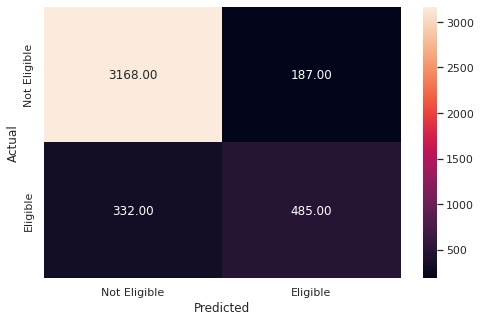

In [ ]:
#Predict for train set
y_train_pred_log_reg = log_reg.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_train_pred_log_reg)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1416
           1       0.78      0.57      0.66       372

    accuracy                           0.88      1788
   macro avg       0.84      0.76      0.79      1788
weighted avg       0.87      0.88      0.87      1788



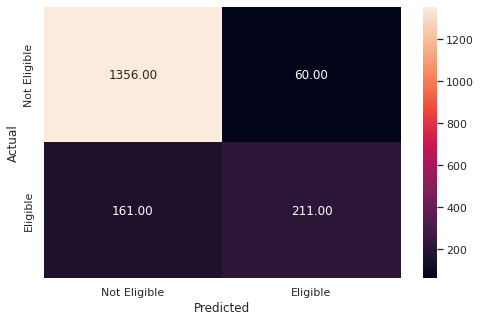

In [ ]:
#Predict for test set

y_test_pred_log_reg = log_reg.predict(X_test)

#checking the performance on the test dataset

metrics_score(y_test, y_test_pred_log_reg)


*   The model is showing an accuracy of around 88% for the train and test sets, but recall is low at around .59 in the train set and .57 in the test set for class 1.  

*   This logistic regression model has imbalanced data. The model is predicting the majority variable (0, no default) so well that it's learning the 0's in the training set.

*   Precision on the train and test sets indicate a 28% likelihood that the model will predict that a customer will default even though they don't. 

### Splitting the data into 80% train and 20% test set

In [ ]:
# Split the data into training and test set 
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)

(4768, 27) (1192, 27)


In [ ]:
log_reg.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3827
           1       0.72      0.59      0.65       941

    accuracy                           0.87      4768
   macro avg       0.81      0.77      0.79      4768
weighted avg       0.87      0.87      0.87      4768



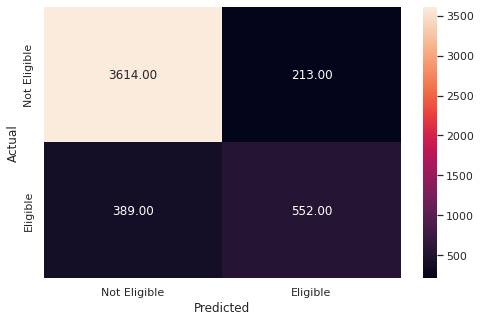

In [ ]:
#Predict for train set
y_train_pred_log_reg = log_reg.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_train_pred_log_reg)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3827
           1       0.72      0.59      0.65       941

    accuracy                           0.87      4768
   macro avg       0.81      0.77      0.79      4768
weighted avg       0.87      0.87      0.87      4768



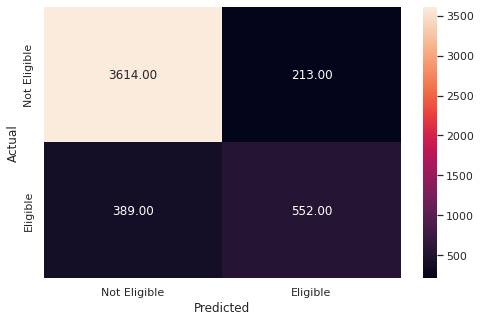

In [ ]:
#Predict for test set

y_test_pred_log_reg = log_reg.predict(X_test)

#checking the performance on the test dataset

metrics_score(y_train, y_train_pred_log_reg)

*   The only for this model is the ratio of the training to test set split from 70/30 to 80/20. 
*   There was almost no improvement in recall. 
*   There was an increase in precision but for this split compared to the previous one. 
*   This model also has imbalanced data. 

#### Treating data by stratifying the train and test split, scaling/normalizing values and specifying class weights for the logistic regression model. 

In [ ]:
# Split the data into training and test set 
X_train, X_test, y_train, y_test =train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)

(4768, 27) (1192, 27)


In [ ]:
# check the distribution
df['BAD'].value_counts()/df.shape[0]

0    0.800503
1    0.199497
Name: BAD, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [ ]:
# define class weights
w = {0:.2, 1:.8}

# Defining the Logistic regression model
log_reg = LogisticRegression(solver='newton-cg', class_weight=w)

# Fitting the model on the training data 
log_reg.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8}, solver='newton-cg')

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3817
           1       0.59      0.77      0.67       951

    accuracy                           0.85      4768
   macro avg       0.77      0.82      0.79      4768
weighted avg       0.87      0.85      0.86      4768



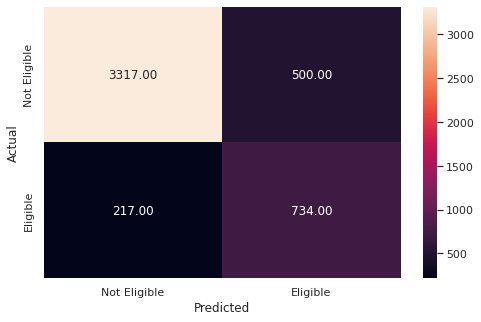

In [ ]:
#Predict for train set
y_train_pred_log_reg = log_reg.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_train_pred_log_reg)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       954
           1       0.59      0.76      0.66       238

    accuracy                           0.85      1192
   macro avg       0.76      0.81      0.78      1192
weighted avg       0.87      0.85      0.85      1192



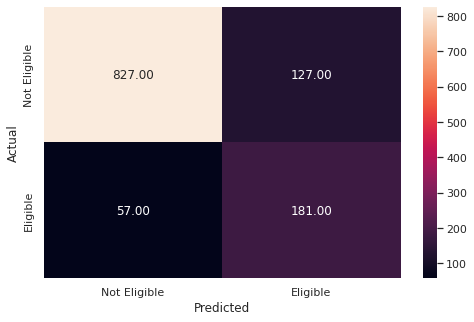

In [ ]:
#Predict for test set

y_test_pred_log_reg = log_reg.predict(X_test)

#checking the performance on the test dataset

metrics_score(y_test, y_test_pred_log_reg)

*   This logistic regression performs better than the previous models in predicting the likelihood of a default.
*   By stratifying the train/test split, the train and test sets maintain class distribution. 
*   Scaling standardizes variables so they can be compared, even though the variables have different units. 
*   Specifying class weights will help resolve errors due to imbalanced data. 
*   Recall has significantly improved in the training and test sets from .59 and .59 to .77 and .76 in the new model.
*   Precision for both training and test sets are .59 which has dropped as a trade off for increased recall. 
*   We will set a precision threshold at .50, meaning misclassifications where it was predicted that the customer would default, but they don't, cannot have more than 50% errors. The bank is losing possible loans by being to stringent in the approval process, but there's less associated cost than if the model predicts a customer will not default and they do.  


#### Let's check the coefficients, check which variables are important and how they affect the process of loan approval

In [ ]:
# Printing the coefficients of logistic regression


cols = X.columns
coef_log_reg = log_reg.coef_
pd.DataFrame(coef_log_reg, columns = cols).T.sort_values(by = 0, ascending = False)

,0
VALUE_missing_values_flag,3.031997
DEBTINC_missing_values_flag,2.691857
CLNO_missing_values_flag,1.111316
CLAGE_missing_values_flag,0.958139
JOB_Sales,0.723884
MORTDUE_missing_values_flag,0.442339
REASON_missing_values_flag,0.339637
JOB_Self,0.306974
REASON_HomeImp,0.254125
NINQ,0.158312


Features that positively affect default rates are:


*   Missing value binary flag columns for current value of property, debt to income ratio, age of oldest credit line in months and the number of existing credit lines are strong indicators used by the model to predict loan defaults. 
*   Applicants identified as sales job type. 
*   Home equity loans for home improvements.
*   Number of recent credit inquiries.
*   Missing value binary flag column for number of credit inquiries. 
*   Debt to income ratio. 
*   Number of existing credit lines. 

As these features increase, loan defaults will also likely increase. 


Features that negatively affect default rates are:

*   Amount of loan approved.
*   Amount due on existing mortgage. 
*   Age of oldest credit line in months. 
*   Years at present job. 
*   Job types other, professional executive and office. 
*   Missing value binary flag columns for years at present job, number of major derogatory credit reports, number of delinquent credit lines and job type.

As these features increase, loan defaults will likely decrease.


*   In this model, delinquent lines of credit and major derogatory reports have no affect on default rates. 
*   The coefficients in the logistice regression model show some similarities with feature importance in the decision tree and random forest models. Logistic regression is giving more magnitude to number of existing credit lines and sales job type, while the decision trees and random forests gave more importance to missing value flag for debt to income. All models used debt to income, age of oldest credit line, and a combination of current value of property, current amount of mortgage due and loan amount. 

The coefficients of the logistic regression model give us the log of odds, which can be difficult to interpret. We can convert the log of odds into odds.

In [ ]:
odds = np.exp(log_reg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
VALUE_missing_values_flag,20.738610
DEBTINC_missing_values_flag,14.759061
CLNO_missing_values_flag,3.038353
CLAGE_missing_values_flag,2.606840
JOB_Sales,2.062427
MORTDUE_missing_values_flag,1.556343
REASON_missing_values_flag,1.404438
JOB_Self,1.359306
REASON_HomeImp,1.289333
NINQ,1.171531


*   A customer identified as job type sales, is twice as likely to default that a customer who does not have a job type of sales. 
*   The odds of a customer with a missing value binary flag for current loan value to default is 20 times the odds of a customer who does not have missing value flag for this feature. 

*   7 of the 8 highest odds to default are missing value flag columns. 

*   The odds of a customer who has a job in sales to default are double the odds of someone who does not work in sales. 



### The Precision-Recall Curve for Logistic Regression

In [ ]:
from sklearn.metrics import precision_recall_curve

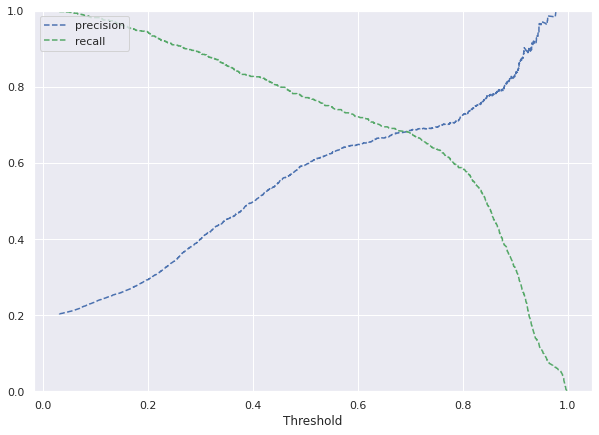

In [ ]:
y_scores_log_reg = log_reg.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class


precisions_log_reg, recalls_log_reg, thresholds_log_reg = precision_recall_curve(y_train, y_scores_log_reg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_log_reg, precisions_log_reg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_log_reg, recalls_log_reg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()


- The logistic regression model was build on the threshold of  greater than 0.5, meaning if an observation has 51% probability of being a 1, then it is classified as a 1. Since we want to capture more possible defaults, we can lower the threshold on class 1 so that if the probability only has to be greater than 45% to be classified as default. The trade off is losing potential customers who would have been good loans. 

*   The precision-recall curve shows precision and recall being balances at a threshold of about .7. Although this threshold may improve the overall accurancy of the model, it's risky for the bank if they are trying to minimize false negatives. The probability of a person to default could be as high as 70% before they are classified as a default. This would allow too many false negative errors.  

*   After training various thresholds from .3-.7, we chose a threshold of .45 based on what the problem of trying to maximize recall. 


              precision    recall  f1-score   support

           0       0.94      0.84      0.89      3817
           1       0.55      0.80      0.65       951

    accuracy                           0.83      4768
   macro avg       0.75      0.82      0.77      4768
weighted avg       0.87      0.83      0.84      4768



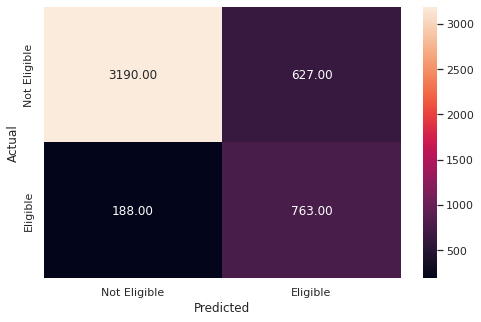

In [ ]:
optimal_threshold1 = .45

y_pred_train = log_reg.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       954
           1       0.53      0.77      0.63       238

    accuracy                           0.82      1192
   macro avg       0.73      0.80      0.75      1192
weighted avg       0.85      0.82      0.83      1192



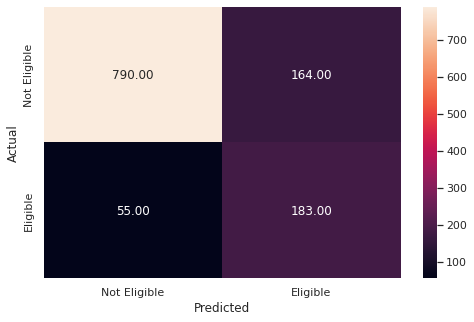

In [ ]:
optimal_threshold1 = .45

y_pred_test = log_reg.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

*   A threshold of .45 returned high recall scores in both training and test sets. Precision is low but still above the minimum of .5. 
*   This model is performing better than any previous regression model on the success metric of increased recall in training and test sets and an overall accuracy around 82-83%. 

###Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
# Fitting the LDA model
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3817
           1       0.65      0.67      0.66       951

    accuracy                           0.86      4768
   macro avg       0.78      0.79      0.79      4768
weighted avg       0.86      0.86      0.86      4768



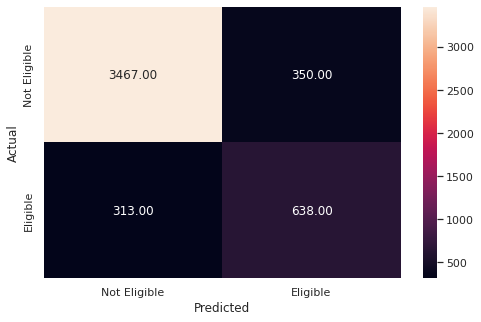

In [ ]:
# Checking model performance of LDA
y_pred_train_lda = lda.predict(X_train)

metrics_score(y_train, y_pred_train_lda)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       954
           1       0.64      0.65      0.65       238

    accuracy                           0.86      1192
   macro avg       0.78      0.78      0.78      1192
weighted avg       0.86      0.86      0.86      1192



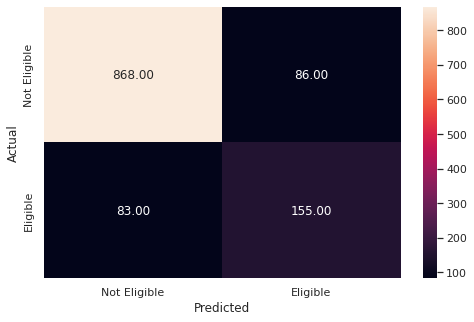

In [ ]:
y_pred_test_lda = lda.predict(X_test)

metrics_score(y_test, y_pred_test_lda)

*   The model is performing moderately but not well enough. 
*   There has been a small improvement in accuracy. 
*   The data is imbalanced and the model is learning the target variable class 0 and won't be able to generalize well on the test set. 

###Find coefficients for LDA

In [ ]:
# Creating the list of column names
cols = X.columns

# Saving coefficients of LDA model
coef_lda = lda.coef_

# Printing the cofficients of LDA
pd.DataFrame(coef_lda, columns = cols).T.sort_values(by = 0, ascending = False)

,0
VALUE_missing_values_flag,5.083180e+00
DEBTINC_missing_values_flag,4.645988e+00
CLNO_missing_values_flag,1.154570e+00
JOB_Sales,1.135239e+00
CLAGE_missing_values_flag,8.990212e-01
MORTDUE_missing_values_flag,5.569958e-01
REASON_missing_values_flag,5.483949e-01
JOB_Self,4.210012e-01
REASON_HomeImp,3.805619e-01
NINQ_missing_values_flag,3.571537e-01


*   The LDA model returns very similar coefficients as the logistic regression model, meaning that they are capturing the same patterns that will have the same interpretations. 


###Precision-Recall Curve

(0.0, 1.0)

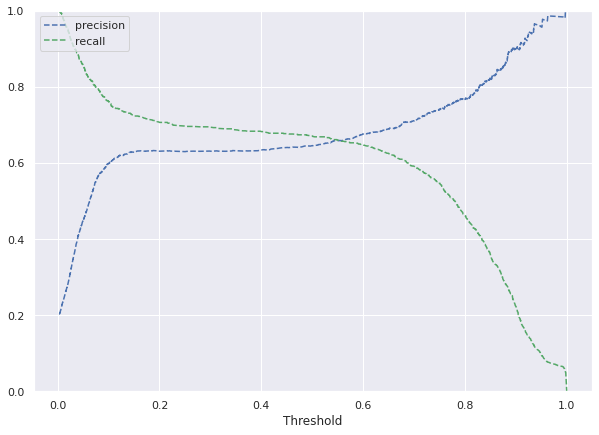

In [ ]:
y_scores_lda = lda.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class

precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train, y_scores_lda[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])


              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3817
           1       0.63      0.71      0.67       951

    accuracy                           0.86      4768
   macro avg       0.78      0.80      0.79      4768
weighted avg       0.87      0.86      0.86      4768



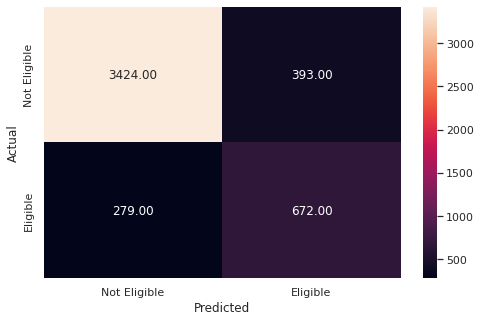

In [ ]:
optimal_threshold1 = .2

y_pred_train_lda = lda.predict_proba(X_train)

metrics_score(y_train, y_pred_train_lda[:,1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       954
           1       0.63      0.69      0.66       238

    accuracy                           0.86      1192
   macro avg       0.78      0.80      0.79      1192
weighted avg       0.86      0.86      0.86      1192



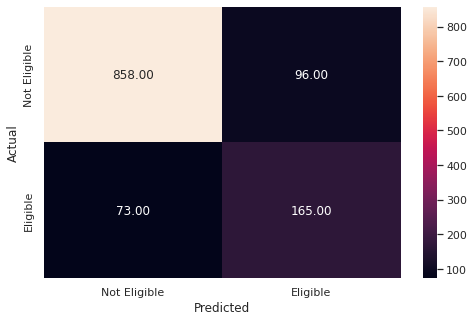

In [ ]:
# Checking performance on the test data
optimal_threshold1 = .2

y_pred_test_lda = lda.predict_proba(X_test)

metrics_score(y_test, y_pred_test_lda[:,1] > optimal_threshold1)

*   This LDA model with a threshold of .2 showed inreased recall in both the training and test sets compared to the previous LDA model. 
*   The model is performing very well on the target variable 0 class but not as well on class 1. 
*   Precision is is around .63 for both sets. Overall accuracy is good at .86.

###Quadratic Discriminant Analysis

In [ ]:
# Fitting QDA model
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3817
           1       0.56      0.66      0.61       951

    accuracy                           0.83      4768
   macro avg       0.74      0.77      0.75      4768
weighted avg       0.84      0.83      0.84      4768



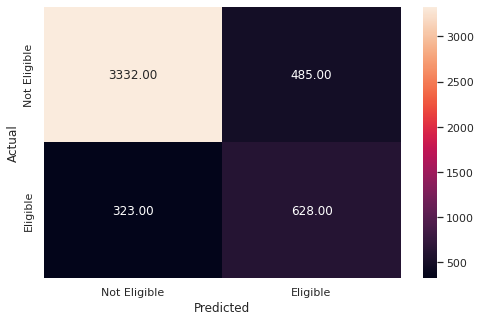

In [ ]:
# Checking model performance on the training data
y_pred_train_qda = qda.predict(X_train)

metrics_score(y_train, y_pred_train_qda)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       954
           1       0.55      0.61      0.58       238

    accuracy                           0.82      1192
   macro avg       0.72      0.74      0.73      1192
weighted avg       0.83      0.82      0.83      1192



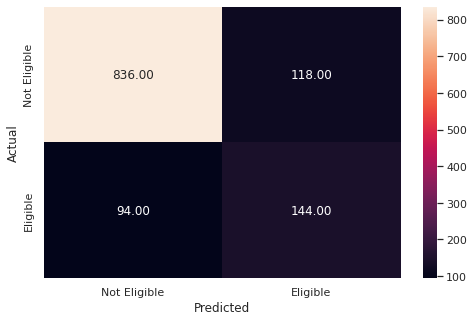

In [ ]:
# Checking performance of the model on the test data
y_pred_test_qda = qda.predict(X_test)

metrics_score(y_test, y_pred_test_qda)

*   This QDA model has much lower recall in comparison to other models.

### **Build a Decision Tree Model**

#### Data Preparation for the tree based model

In [ ]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(value = data[num_data.columns].median(), inplace = True)

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500.0,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True


#### Separating the target variable y and independent variable x

In [ ]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix

X = df.drop(columns = 'BAD')

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)

Y = df['BAD']

#### Split the data

In [ ]:
# Split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1) 

In [ ]:
print("Shape of the training set: ", X_train.shape)   

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (4768, 27)
Shape of the test set:  (1192, 27)
Percentage of classes in the training set:
0    0.802643
1    0.197357
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


In [ ]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}

dt = tree.DecisionTreeClassifier()
DecisionTreeClassifier(class_weight = {0:0.2, 1:0.8})

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

In [ ]:
#fitting Decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

#### Checking the performance on the train dataset

In [ ]:
# Checking performance on the training data
y_train_pred_dt = dt.predict(X_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



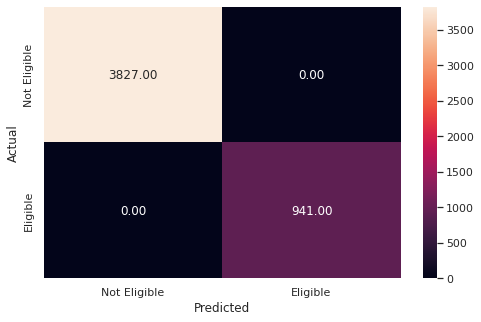

In [ ]:
metrics_score(y_train, y_train_pred_dt)

*   The decision tree is returning 100% on all matrices and is overfitting the train dataset. It's learning the training data too well and won't be able to generalize on new data.  

#### Checking the performance on the test dataset

In [ ]:
# Checking performance on the testing data

y_test_pred_dt = dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       944
           1       0.67      0.59      0.63       248

    accuracy                           0.85      1192
   macro avg       0.78      0.76      0.77      1192
weighted avg       0.85      0.85      0.85      1192



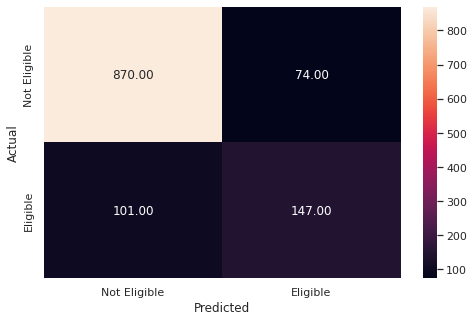

In [ ]:
metrics_score(y_test, y_test_pred_dt)

*   The model is performing poorly for the recall metric. 
*   The model has a high accuracy score which is misleading because it's accurately predicting the class we're not as concerned with.  

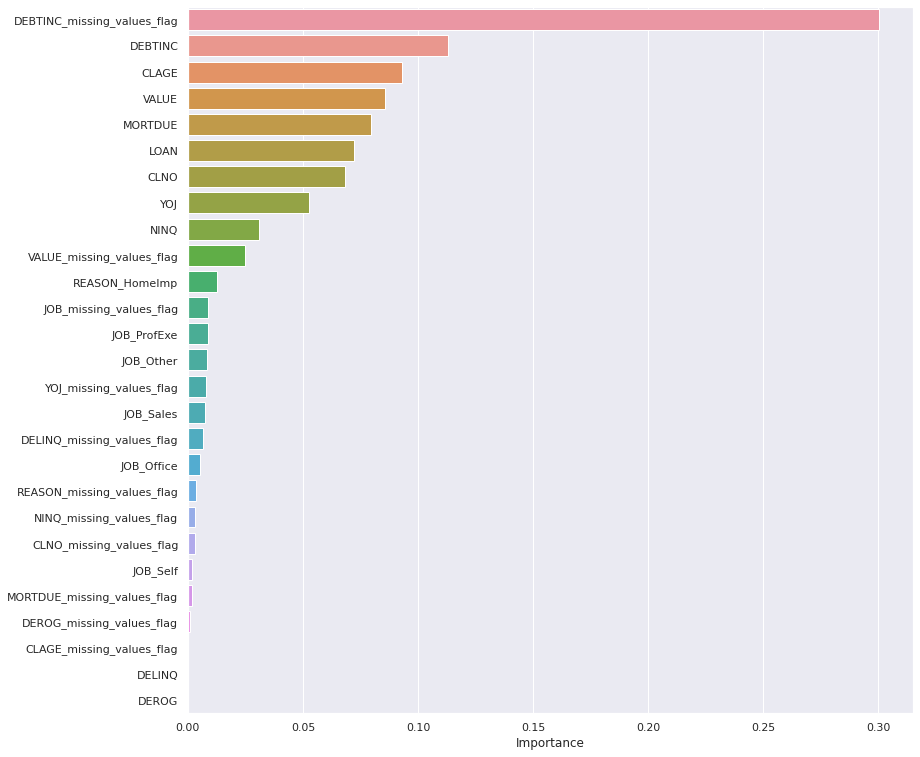

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

*   Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. So, when many observations reach the node and it also has high purity where all or most of the observations can be classified into a single class, it will have a high feature importance.  

The top 5 most important features in predicting the likelihood of loan defaults are (in order):

*   Missing flags for debt to income ratio
*   The age of a customer's oldest credit line 
*   Current value of the property
*   Amount due on existing mortgage. 

[Text(0.5431034482758621, 0.9, 'node #0\nDEBTINC_missing_values_flag <= 0.5\ngini = 0.317\nsamples = 4768\nvalue = [3827, 941]\nclass = y[0]'),
 Text(0.27586206896551724, 0.7, 'node #1\nDEBTINC <= 44.671\ngini = 0.153\nsamples = 3747\nvalue = [3434, 313]\nclass = y[0]'),
 Text(0.13793103448275862, 0.5, 'node #2\nVALUE_missing_values_flag <= 0.5\ngini = 0.124\nsamples = 3673\nvalue = [3430, 243]\nclass = y[0]'),
 Text(0.06896551724137931, 0.3, 'node #3\nCLNO <= 2.5\ngini = 0.117\nsamples = 3653\nvalue = [3425, 228]\nclass = y[0]'),
 Text(0.034482758620689655, 0.1, '\n  (...)  \n'),
 Text(0.10344827586206896, 0.1, '\n  (...)  \n'),
 Text(0.20689655172413793, 0.3, 'node #454\nYOJ_missing_values_flag <= 0.5\ngini = 0.375\nsamples = 20\nvalue = [5, 15]\nclass = y[1]'),
 Text(0.1724137931034483, 0.1, '\n  (...)  \n'),
 Text(0.2413793103448276, 0.1, '\n  (...)  \n'),
 Text(0.41379310344827586, 0.5, 'node #457\nCLAGE <= 299.897\ngini = 0.102\nsamples = 74\nvalue = [4, 70]\nclass = y[1]'),
 Tex

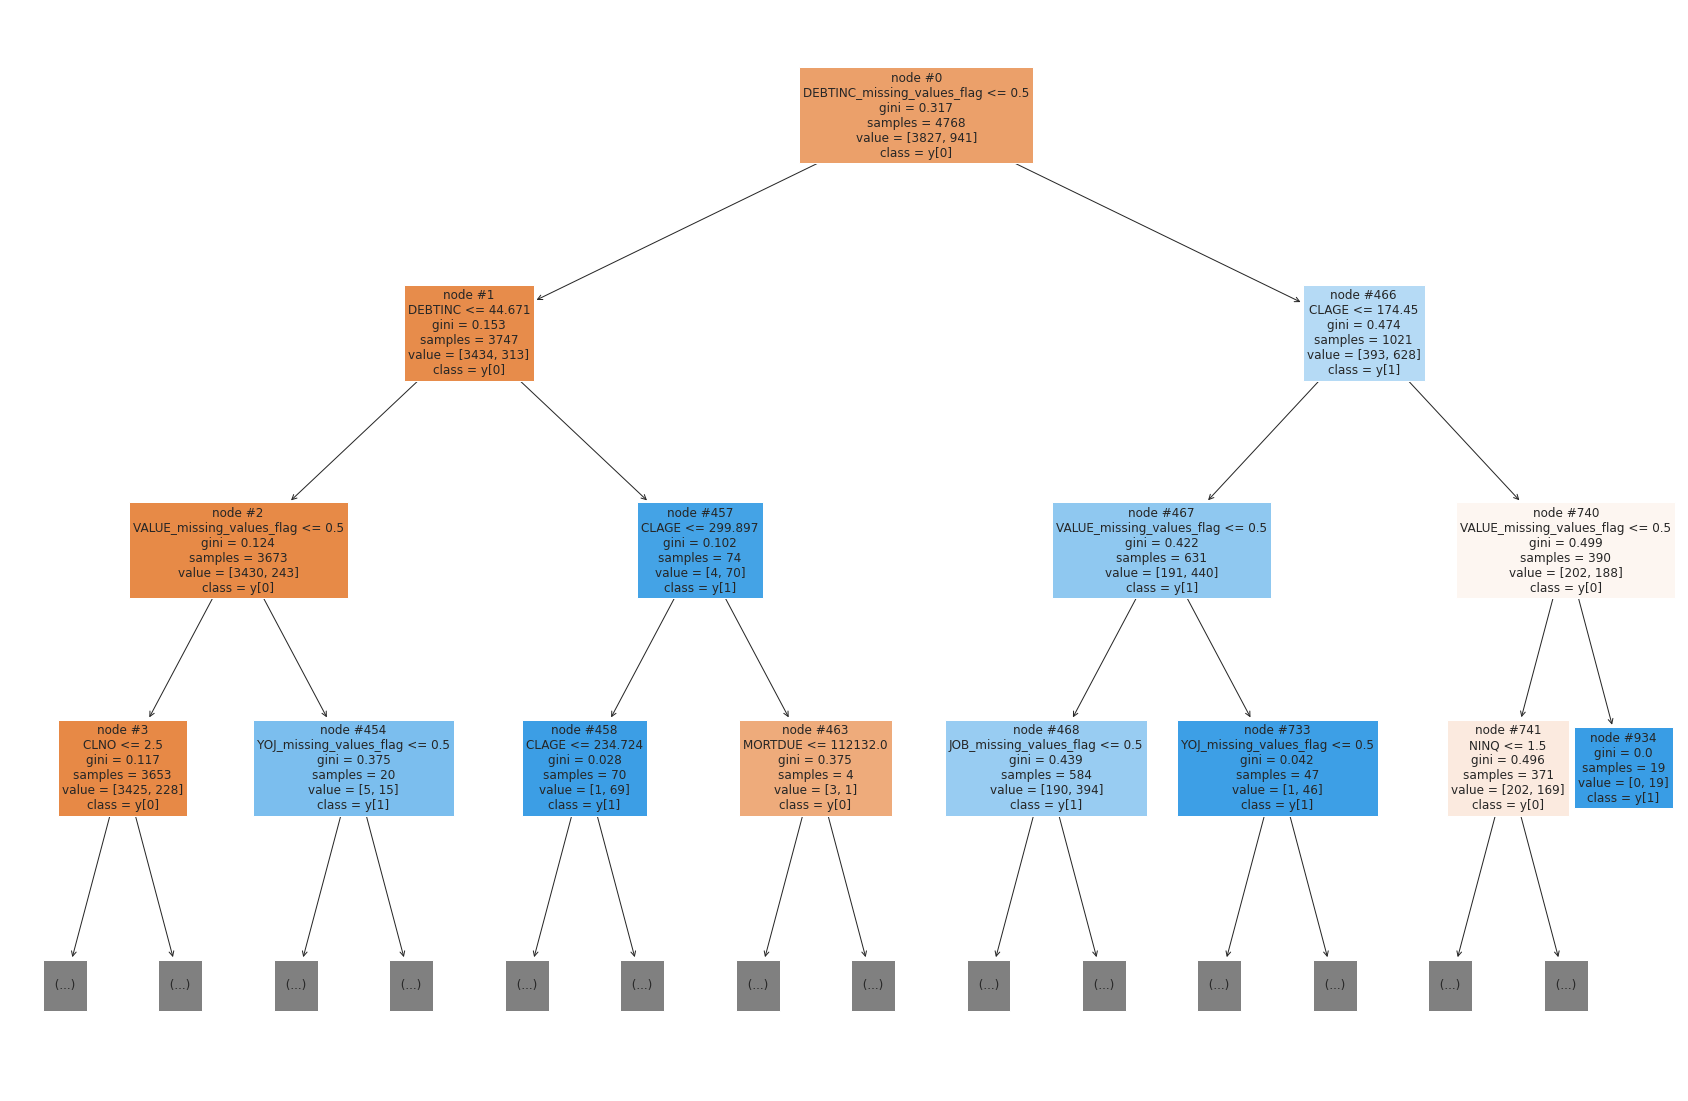

In [ ]:
# Plot the decision  tree and analyze it to build the decision rule


features = list(X.columns)

plt.figure(figsize= (30, 20 ))

tree.plot_tree(dt, max_depth= 3, feature_names= features, filled = True, fontsize= 12, node_ids= True, class_names= True)

   
*   Customers have a class 0 flag in debt to income (meaning the value is true and not imputed), have debt to income ratios less than about 44.67% and have less than 2.5 existing lines of credit, are less likely to default. These would be customer who have healthy money management practices. 
*    Customers who have a class 1 flag in debt to income (meaning the value is estimated using the median or mode for that class), have an oldest credit line of less than about 14 years and a missing value flag for the current value of the property, are more likely to default. It may be a customer who does not put as much effort into money management practices, hence the missed columns. They may be young and not have a long, established credit history. 
 

###Find optimal max_depth

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 1)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)


Text(0.5, 0, 'max depth')

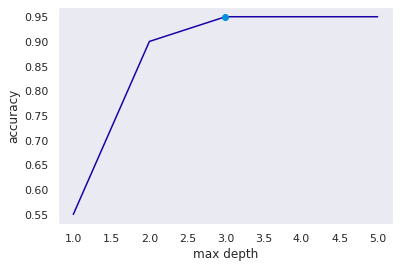

In [ ]:
import matplotlib.pyplot as plt

accuracy = [0.55, 0.9, 0.95, 0.95, 0.95]
max_depth = list(range(1, 6))

plt.plot(max_depth, accuracy) #adds the line
plt.plot(3, 0.95, marker='o') #adds the point
plt.grid() #adds a grid to the plot
plt.ylabel('accuracy') #xlabel
plt.xlabel('max depth') #ylabel

*   The optimal max_depth for this decision tree is 3.

In [ ]:
clf = tree.DecisionTreeClassifier()
DecisionTreeClassifier(class_weight = {0:0.2, 1:0.8}, max_depth=3)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=3)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



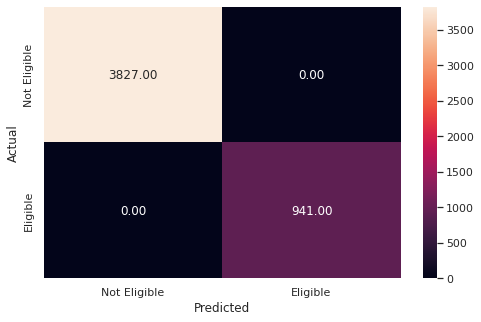

In [ ]:
y_train_pred_dt = clf.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

*   The decision tree is returning 100% on all matrices and is overfitting the train dataset. It's learning the training data too well and won't be able to generalize on new data.

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       944
           1       0.67      0.59      0.63       248

    accuracy                           0.85      1192
   macro avg       0.78      0.76      0.77      1192
weighted avg       0.85      0.85      0.85      1192



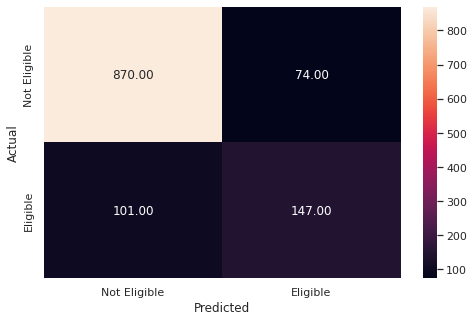

In [ ]:
y_test_pred_dt = clf.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

*   The model is overfitting the training data. 
*   Recall score is low.

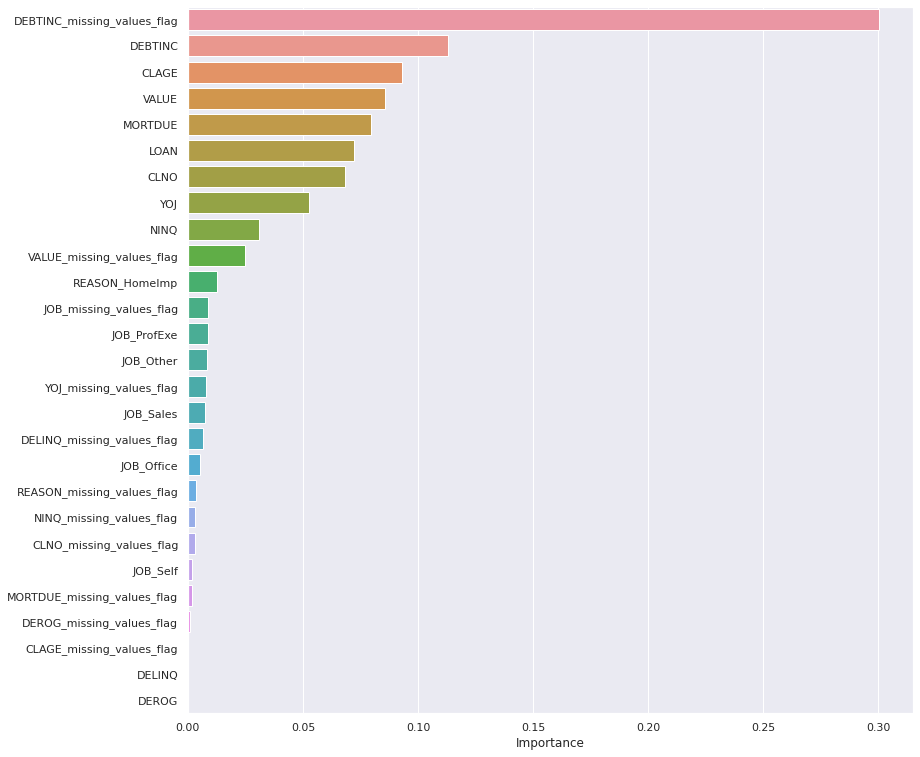

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

*  Feature importance is the same as the previous model. 

### **Decision Tree - Hyperparameter Tuning**

#### Using GridSearchCV for Hyperparameter tuning on the model

In [ ]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)


# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 5)



# Fit the GridSearch on train dataset
gridCV = gridCV.fit(X_train, y_train)


# Set the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_


# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=6,
                       min_samples_leaf=25, random_state=1)

*   GridSearch has found that the optimal parameters for the random forest model are class weights of 17.83, a max_depth of 6 and min_samples_leaf of 25. 

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3827
           1       0.59      0.81      0.68       941

    accuracy                           0.85      4768
   macro avg       0.77      0.84      0.79      4768
weighted avg       0.88      0.85      0.86      4768



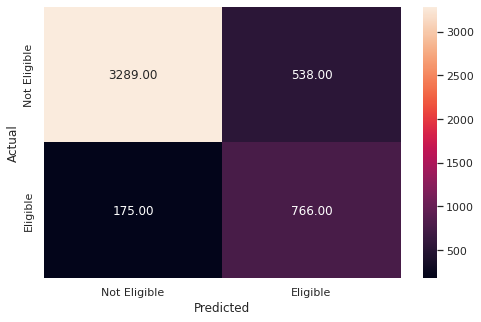

In [ ]:
# Checking performance on the training data based on the tuned model
y_train_pred_dt = dtree_estimator.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       944
           1       0.60      0.74      0.66       248

    accuracy                           0.84      1192
   macro avg       0.76      0.80      0.78      1192
weighted avg       0.86      0.84      0.85      1192



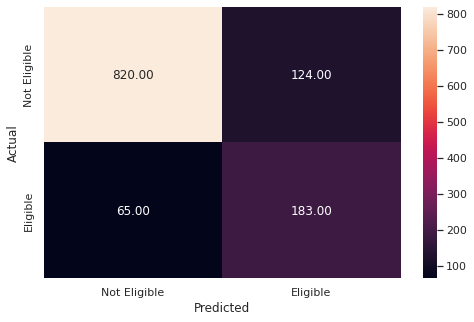

In [ ]:
# Checking performance on the testing data based on the tuned model
y_test_pred_dt = dtree_estimator.predict(X_test)
metrics_score(y_test, y_test_pred_dt)


*   Recall score has improved to .81 on the training set and to .74 on the test set. 
*   This model has the highest recall scores on training and tests out of the decision tree models. 
*   Precision is good at .59 for the training set and .60 for the test set.  
*   This model has a good balance of precision and recall as well as an overall accuracy of 85% on the training data and 84% on the test data.   
  

#### Plotting the Decision Tree

[Text(0.5431034482758621, 0.9, 'node #0\nDEBTINC_missing_values_flag <= 0.5\ngini = 0.317\nsamples = 4768\nvalue = [3827, 941]\nclass = y[0]'),
 Text(0.27586206896551724, 0.7, 'node #1\nDEBTINC <= 44.671\ngini = 0.153\nsamples = 3747\nvalue = [3434, 313]\nclass = y[0]'),
 Text(0.13793103448275862, 0.5, 'node #2\nVALUE_missing_values_flag <= 0.5\ngini = 0.124\nsamples = 3673\nvalue = [3430, 243]\nclass = y[0]'),
 Text(0.06896551724137931, 0.3, 'node #3\nCLNO <= 2.5\ngini = 0.117\nsamples = 3653\nvalue = [3425, 228]\nclass = y[0]'),
 Text(0.034482758620689655, 0.1, '\n  (...)  \n'),
 Text(0.10344827586206896, 0.1, '\n  (...)  \n'),
 Text(0.20689655172413793, 0.3, 'node #454\nYOJ_missing_values_flag <= 0.5\ngini = 0.375\nsamples = 20\nvalue = [5, 15]\nclass = y[1]'),
 Text(0.1724137931034483, 0.1, '\n  (...)  \n'),
 Text(0.2413793103448276, 0.1, '\n  (...)  \n'),
 Text(0.41379310344827586, 0.5, 'node #457\nCLAGE <= 299.897\ngini = 0.102\nsamples = 74\nvalue = [4, 70]\nclass = y[1]'),
 Tex

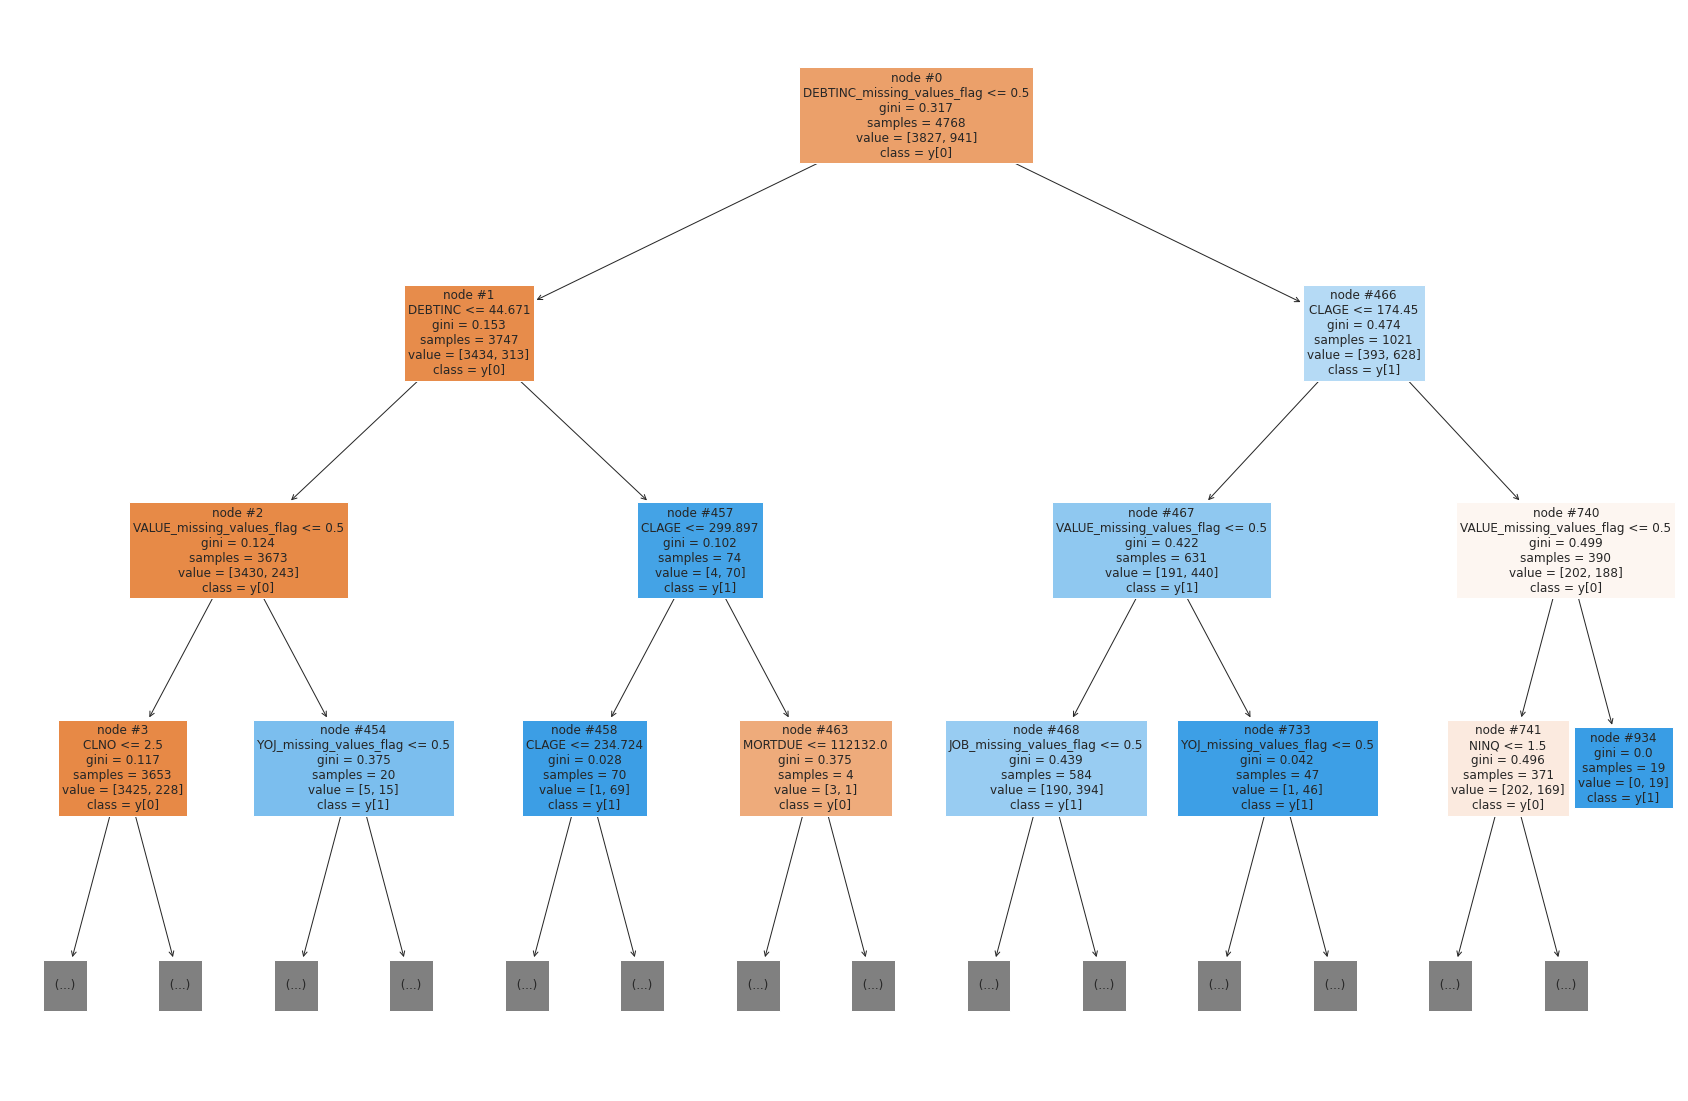

In [ ]:
# Plot the decision  tree and analyze it to build the decision rule


features = list(X.columns)

plt.figure(figsize= (30, 20 ))

tree.plot_tree(dt, max_depth= 3, feature_names= features, filled = True, fontsize= 12, node_ids= True, class_names= True)

*   Customers who have a true value for debt to income ratio of less than about 44.67%, a true value for current value of home and less than 2.5 existing lines of credit are less likely to default. These may be customers who care about their money management practices enough to fill out the entire application and don't keep lots of credit lines open. 
*   Customers who have less than 14 years credit history, and missing values in years at current job, job type and value of current home, are more likely to default. They may be young and lack a strong credit history. They may also be distracted from money management practices as shown by not filling out the application entirely. 


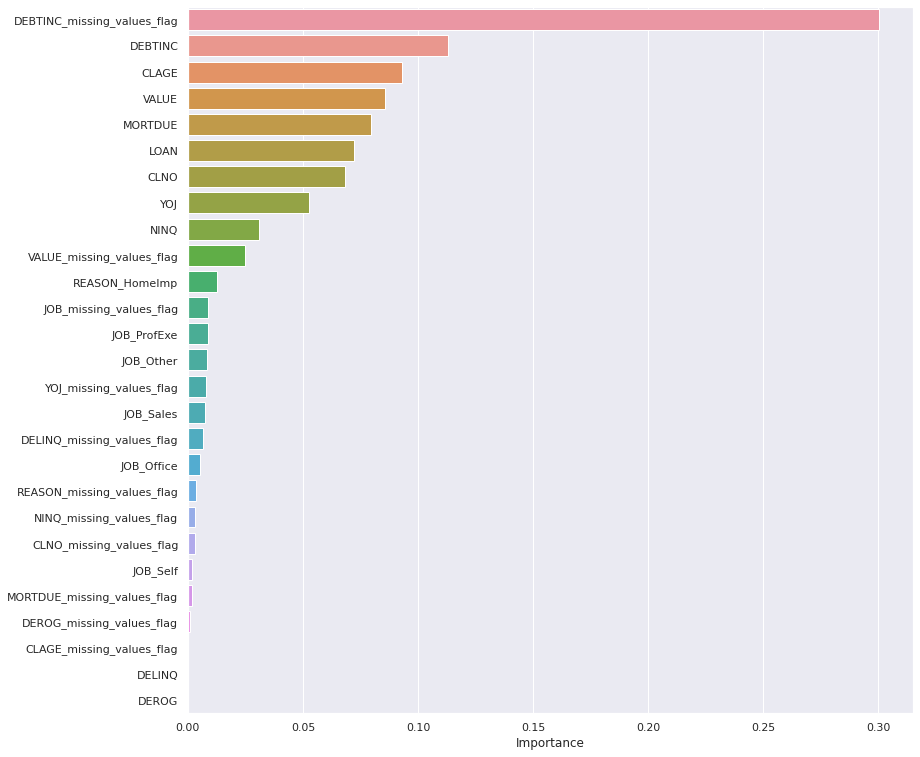

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

All 3 decision trees had the same top 5 most important features:

*   Missing flag in debt to income. 
*   Debt to income.
*   Age of oldest credit line.
*   Current value of property.
*   Amount due on existing mortgage. 

### **Building a Random Forest Classifier**

In [ ]:
# Defining Random forest CLassifier

rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



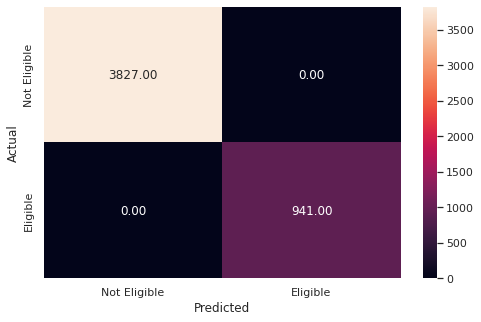

In [ ]:
#Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

*   The random forest is giving a 100% score on all matrices on the training data and overfitting the training data.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       944
           1       0.81      0.65      0.72       248

    accuracy                           0.89      1192
   macro avg       0.86      0.80      0.83      1192
weighted avg       0.89      0.89      0.89      1192



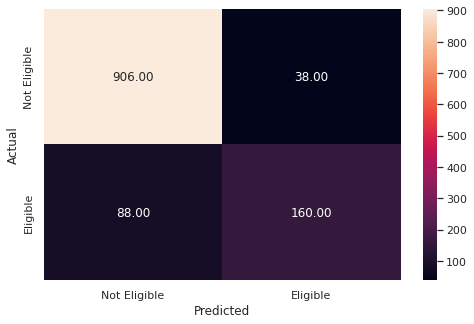

In [ ]:
# Checking performance on the test data

y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

*   The random forest classifier is over fitting the training data and learning the target variable class 0 too well and will not be able to generalize new data. 
*   The test set recall score was .65 with a precision score of .81. Here the precision-recall trade off is moving in the opposite direction as we would like.  

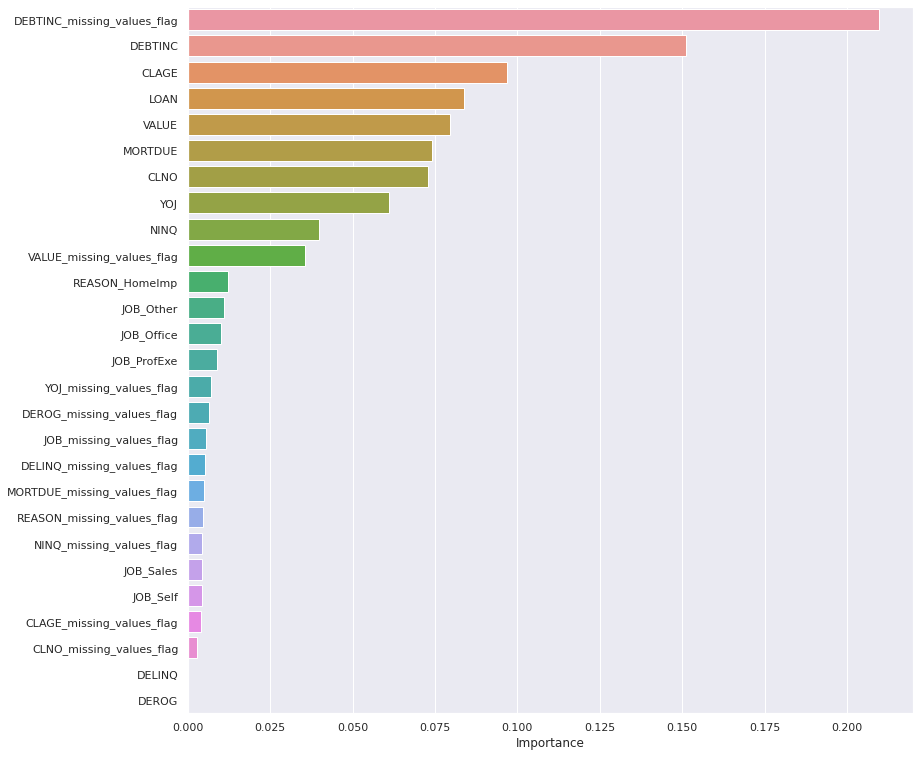

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

The top 5 most important features for predicting defaults are:

*   Debt to income ratio.
*   Missing flag value for debt to income.
*   Age of oldeest line of creit.
*   Approved loan amount.
*   Current value of the property. 


*   All of the top 5 are the same as the decision trees except for the last one. Current value of the property and amount of mortgage due have switched spots.

### **Build a Random Forest model with Class Weights**

In [ ]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}


rf_estimator = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

rf_estimator.fit(X_train, y_train)

# Fitting Random Forest model

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



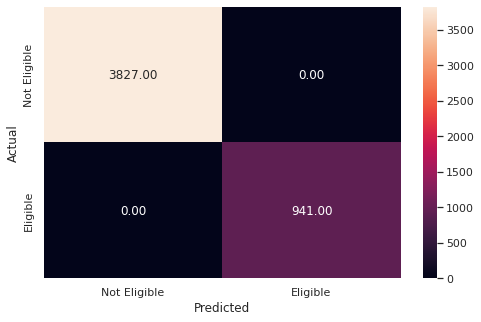

In [ ]:
# Checking performance on the train data

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

*   The random forest is giving a 100% score on all matrices in the training set and is overfitting the training data.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       944
           1       0.83      0.63      0.71       248

    accuracy                           0.90      1192
   macro avg       0.87      0.80      0.82      1192
weighted avg       0.89      0.90      0.89      1192



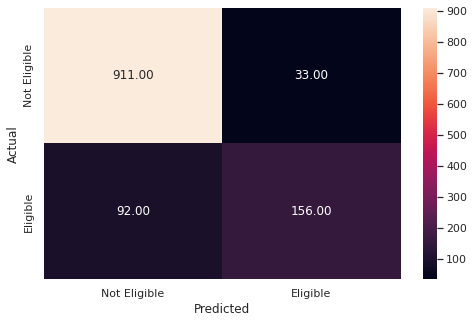

In [ ]:
# Checking performance on the test data

y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

*   We can see a small improvement of recall at .63 and precision at .83 in the test set as compared to the model without class weights. 

### Random Forest with class weights balanced. 

In [ ]:
# Defining Random Forest model with class weights class_weight='balanced'


rf_estimator = RandomForestClassifier(class_weight = 'balanced', random_state = 1)

rf_estimator.fit(X_train, y_train)

# Fitting Random Forest model

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



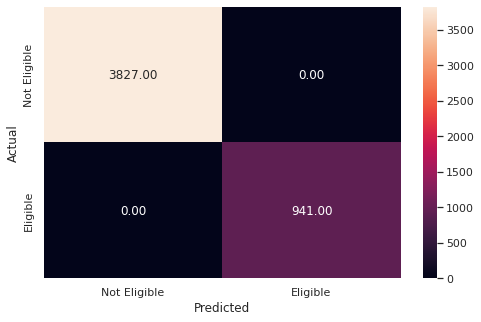

In [ ]:
# Checking performance on the train data

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

*   The random forest is overfitting the training data and return 100% on all metrics.

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       944
           1       0.83      0.66      0.74       248

    accuracy                           0.90      1192
   macro avg       0.87      0.81      0.84      1192
weighted avg       0.90      0.90      0.90      1192



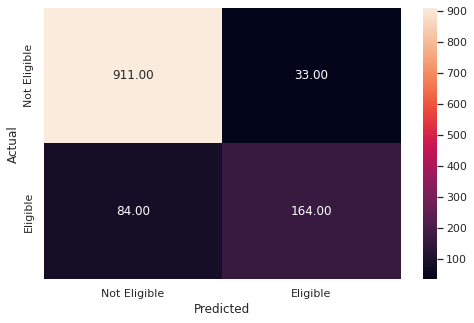

In [ ]:
# Checking performance on the test data

y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

*   Assigning class weights as 'balanced' has given a small increase in recall in the test set with no change in presicion. 

*   Tuned class_weights to 'balanced' automatically uses the inverse weighting from the training dataset, giving focus to the minority class.

### **Tuning the Random Forest**

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [ ]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)


# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)


#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, min_samples_leaf=3,
                       random_state=1)

*   GridSearch has found that the optimal parameters for this model are class weights of 20/80 and min_samples_leaf of 3.

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3827
           1       0.80      0.97      0.87       941

    accuracy                           0.95      4768
   macro avg       0.89      0.95      0.92      4768
weighted avg       0.95      0.95      0.95      4768



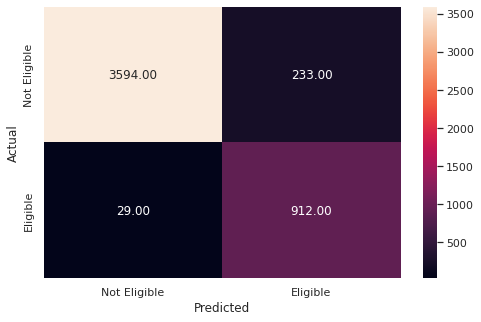

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       944
           1       0.72      0.76      0.74       248

    accuracy                           0.89      1192
   macro avg       0.83      0.84      0.84      1192
weighted avg       0.89      0.89      0.89      1192



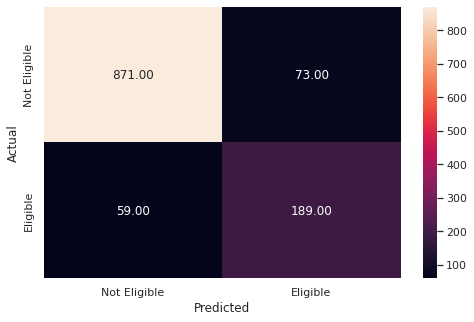

In [ ]:
# Checking performace on test dataset

y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

##Final Model Performance

*   Recall scores on the model are .97 on the training set and .76 on the test set. These are the highest recall scores of all the models.
*   Precision is high at .8 on the training set and .72 on the test set. 
*   Accuracy is also up at .95 on the training set and .89 on the test set.

*   This tuned random forest model is performing the best at predicting likeliness of loan default with high scores in recall, precision and accuracy.  

#### Plot the Feature importance of the tuned Random Forest

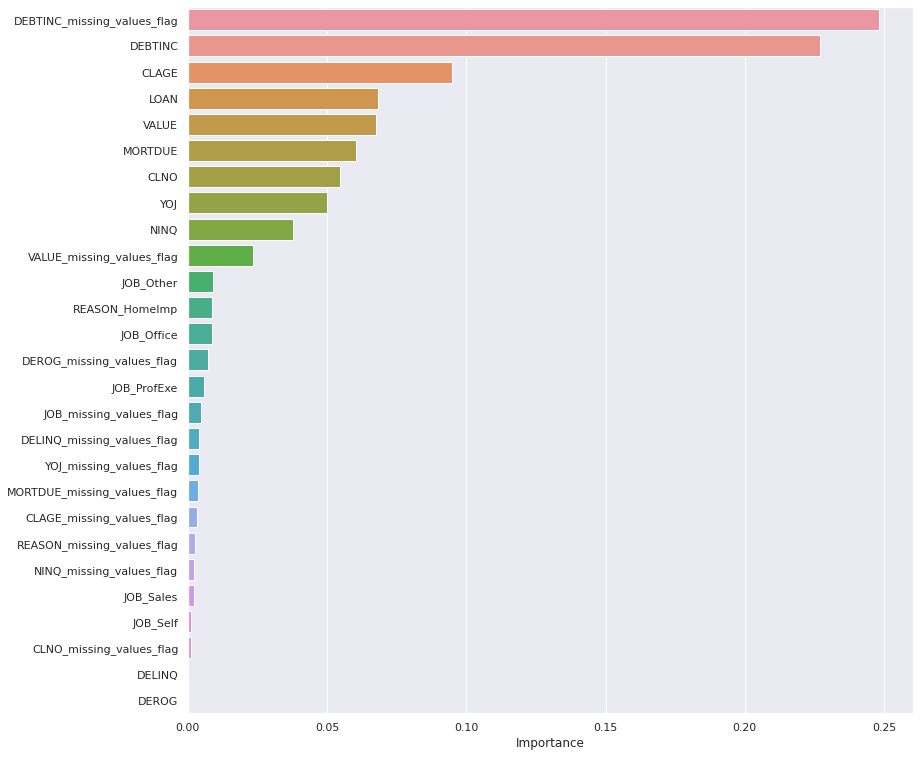

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

##Feature Importance and regression coefficients

*   The coefficients in the logistice regression model show similarities with feature importance in the decision tree and random forest models. Logistic regression is giving more magnitude to number of existing credit lines and sales job type, while the decision trees and random forests gave more importance to missing value flag for debt to income. All models used debt to income, age of oldest credit line, and a combination of current value of property, current amount of mortgage due and loan amount. 

*   The models have Debt to income ratio and whether a customer provided the debt to income information, age of oldest credit line, existing credit lines and a combination of current value, existing mortgage due or loan amount seem to be the most important features

*   Feature importance in the tree based models and coefficients of variables in the regression models agree that debt to income is the strongest driving factor of loan defaults.  


### **Comparing Model Performances**

In [ ]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [ ]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [ ]:
# Make the list of all the model names 

models = [log_reg, lda, qda, dt, clf, dtree_estimator, rf_estimator, rf_estimator_tuned]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':[log_reg, lda, qda, dt, clf, dtree_estimator, rf_estimator, rf_estimator_tuned], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,"LogisticRegression(class_weight={0: 0.2, 1: 0....",0.846896,0.856544,0.777896,0.737903,0.584198,0.633218
1,LinearDiscriminantAnalysis(),0.858641,0.867450,0.670563,0.653226,0.634171,0.692308
2,QuadraticDiscriminantAnalysis(),0.829279,0.827181,0.650372,0.645161,0.557885,0.575540
3,DecisionTreeClassifier(),1.000000,0.853188,1.000000,0.592742,1.000000,0.665158
4,DecisionTreeClassifier(),1.000000,0.853188,1.000000,0.592742,1.000000,0.665158
5,"DecisionTreeClassifier(class_weight={0: 0.17, ...",0.850461,0.841443,0.814028,0.737903,0.587423,0.596091
6,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.901846,1.000000,0.661290,1.000000,0.832487
7,"(DecisionTreeClassifier(max_features='auto', m...",0.945050,0.889262,0.969182,0.762097,0.796507,0.721374


## **Conclusion**

*   The best model we have so far is the tuned random forest model which is giving a recall score of .76 for class 1 in the test set. 
*   The bank should use this model to know before loan approval which  customers will default and act accordingly. 
*   Debt to income ratio and whether a customer provided the debt to income information, age of oldest credit line, existing credit lines and a combination of current value, existing mortgage due or loan amount seem to be the most important features. 

## **Recommendations**

*   We saw that debt to income ratio is the most important driver of loan default. The debt to income ratio is so important that not having this information greatly affects predictions of loan default. Employees should pay particular attention to collecting and verifying a customer's debt to income information for a loan applications. Customers with debt to income ratios less than about 44% were less likely to default.
*   We saw that age of oldest credit line was also an important driver of default. Customers with credit lines of about 15 years or more were less likely to default. These customers have a longer, more stable credit histories, and would be older in age with good money management practices. The bank should target marketing home equity loans to customers with these attributes to increase interest revenue. 
*   Customers who identified their job type as sales were twice as likely to default than customers who did not work in sales. Before final approval, the bank should require another review or additional verification step for customers who work in sales to reduce costly loan defaults.  
VALUE/LOAN/MORT DUE
*   In order to improve the model's predictions of default, some improvements should be made to the data collection and application process. 
*   Employees should make sure that all data fields are filled in by the customer, since missing values greatly affect the model. If the customer is filling out applications online, they should not be able to complete and submit the application with missing values. 
*   Review and modify job types so that it has more relevant labels than 'other'. We also want to keep the unique values at 9 or less. This will help the model predict accurately. We can add healthcare or hospitality and combine manager with professional executive or office worker. The bank's customers should be well represented. 
*   Remove delinquent lines or credit and major derogatory reports. These features did not affect the model or drive default. We can replace this information with a customer's credit score to see if it is more indicative of loan defaults. 